## Описание проекта

В этом проекте мы будем работать с выложенными в общий доступ историческими данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation).

**Задачи проекта:**

1. Выявить определяющие успешность игры закономерности.
2. Проверить гипотезы: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Эти данные позволят спрогнозировать поведение потенциальных клиентов, выявить наиболее популярный продукт и спланировать рекламные кампании для интернет-магазина "Стримчик".



## Описание данных

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й (*данные за 2016 год могут быть неполными*). Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура **ESRB** (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB  



## Шаг 1. Извлечение данных и изучение общей информации

### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

### Откроем файл, присвоим переменной games наш датасет

In [3]:
games = pd.read_csv('data_games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Оценим общие данные датафрейма

In [4]:
#выведем первые 10 строк датафрейма
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
#выведем рандомные 10 строк датафрейма
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11704,GT Advance 3: Pro Concept Racing,GBA,2002.0,Racing,0.05,0.02,0.00,0.00,74.0,tbd,E
10092,Coraline,PS2,2009.0,Action,0.06,0.04,0.00,0.01,39.0,2,E10+
7695,Aikatsu! Cinderella Lesson,3DS,2012.0,Role-Playing,0.00,0.00,0.20,0.00,NaN,NaN,NaN
14553,Ducati World Racing Challenge,PS,2001.0,Racing,0.02,0.01,0.00,0.00,68.0,tbd,E
3263,Super Robot Taisen α Gaiden,PS,2001.0,Strategy,0.00,0.00,0.58,0.04,NaN,NaN,NaN
15237,428: Fuusa Sareta Shibuya de,PS3,2009.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9529,Rock Band Track Pack Volume 1,PS2,2008.0,Misc,0.06,0.05,0.00,0.02,NaN,tbd,T
16160,Pachitte Chonmage Tatsujin 16: Pachinko Hissat...,PS2,2010.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
1480,UFC Undisputed 2010,X360,2010.0,Fighting,0.90,0.31,0.00,0.11,84.0,6.7,T
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [6]:
#выведем последние 10 строк датафрейма
games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [7]:
#проверим типы столбцов и количество непропущенных значений
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
#подсчитаем общее количество пропущенных значений в каждом столбце датафрейма.
games.isnull().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

In [10]:
#посмотрим описательную статистику каждого столбца в датафрейме
games.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [11]:
#проверим датафрейм на явные дубликаты
games.duplicated().sum()

0

In [12]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

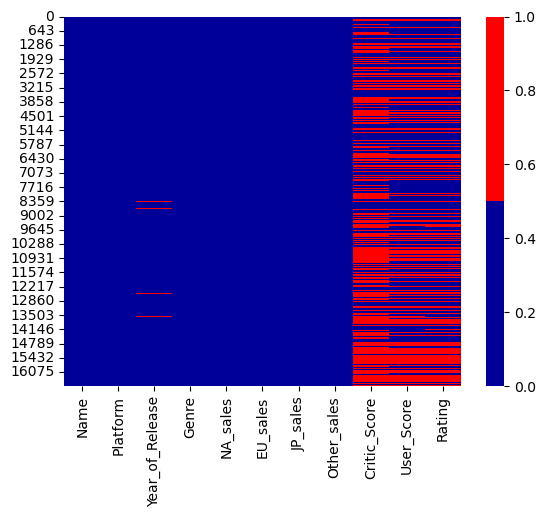

In [13]:
#Построим тепловую карту пропущенных значений. Красный цвет - пропущенные данные, синий - не пропущенные.
cols = games.columns[:11]
# определяем цвета
colours = ['#000099', '#ff0000'] 
sns.heatmap(games[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

## Вывод по шагу 1

1. Регистр букв в названиях столбцов различается, нужно будет привести к единому нижнему регистру.
2. В датафрейме есть пропуски NaN причина которых не известна.
3. В датафрейме 16715 строк и 11 столбцов.
4. Изменить тип данных в столбцах: Year_of_Release на целое число и User_Score на float64.
5. Пропуски есть в 6 столбцах из 11:
* Name - 2 (0.01%)
* Genre - 2 (0.01%)
* Year_of_Release - 269 (1.61%)
* User_Score - 6701 (40.09%)
* Rating - 6766 (40.48%)
* Critic_Score - 8578 (51.32%)
6. На основе описательной статистики, мы видим следующее:
* столбец Name - 11559 уникальных элементов, наиболее часто встречающееся значение - Need for Speed: Most Wanted (12 упоминаний).  
* столбец Platform - 31 уникальный элемент, наиболее часто встречающееся значение - PS2 (2161 упоминаний).  
* столбец Genre - 12 уникальных элементов, наиболее часто встречающееся значение Action (3369 упоминаний).  
* столбец User_Score - 96 уникальных элементов, наиболее часто встречающееся значение - tbd, что весьма странно т.к. там должны быть преимущественно числовые значения (2424 упоминаний).  
* столбец Rating - 8 уникальных элементов, наиболее часто встречающееся значение - E (3990 упоминаний).  
7. Дубликатов в датафрейме нет.

Вызывает опасение большое количество отсутствующих данных в столбце Critic_Score. На этапе предобработки посмотрим с чем это может быть связано. Возможно эти данные можно восполнить из аналогичных оценок на других платформах. Однако жаль, что уточнить причину отсутствия этих данных мы не сможем т.к. они взяты в данном виде из открытого источника.

## Шаг 2. Предобработка данных

### Приведем названия столбцов к единому нижнему регистру

In [14]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [15]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в столбце 'year_of_release'

In [16]:
print('Количество пропущенных значений в столбце year_of_release:', games['year_of_release'].isnull().sum())

Количество пропущенных значений в столбце year_of_release: 269


In [17]:
games = games.dropna(subset=['year_of_release'])
print('Количество пропущенных значений в столбце year_of_release:', games['year_of_release'].isnull().sum())

Количество пропущенных значений в столбце year_of_release: 0


In [18]:
games['year_of_release'] = games['year_of_release'].astype('int64')

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


### Преобразуем данные в столбце 'user_score'

In [20]:
print('Количество пропущенных значений в столбце user_score:', games['user_score'].isnull().sum())

Количество пропущенных значений в столбце user_score: 6607


In [21]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [22]:
games[games['user_score'] == 'tbd']['user_score'].count()

2376

In [23]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [24]:
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)

In [25]:
games['user_score'] = games['user_score'].astype(float)
games['user_score'].dtype

dtype('float64')

In [26]:
print('Количество пропущенных значений в столбце user_score:', games['user_score'].isnull().sum())

Количество пропущенных значений в столбце user_score: 8983


In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Преобразуем данные в столбце 'rating'

In [28]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [29]:
games['rating'] = games['rating'].str.replace(r'K-A', 'E')

In [30]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [33]:
games['rating'] = games['rating'].fillna("no_ESRB")
games['rating']

0              E
1        no_ESRB
2              E
3              E
4        no_ESRB
          ...   
16710    no_ESRB
16711    no_ESRB
16712    no_ESRB
16713    no_ESRB
16714    no_ESRB
Name: rating, Length: 16446, dtype: object

### Преобразуем данные в столбце 'name'

In [34]:
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,no_ESRB
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,no_ESRB


In [35]:
games.dropna(subset=['name'],inplace=True)

In [36]:
print('Количество пропущенных значений в столбце name:', games['name'].isnull().sum())

Количество пропущенных значений в столбце name: 0


In [37]:
games.isnull().sum().sort_values(ascending = False) / games.shape[0] * 100

user_score         54.615665
critic_score       51.453418
name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
rating              0.000000
dtype: float64

### Изучим данные в столбце 'critic_score'

In [38]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [39]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRB
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRB
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_ESRB
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_ESRB


In [40]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [42]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRB,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_ESRB,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_ESRB,28.31


## Шаг 3. Исследовательский анализ данных

### Посмотрим на динамику выпуска игр в разные годы и важны ли данные за все периоды.

In [43]:
#посмотрим, сколько игр выпускалось в разные годы
games.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False).reset_index()

,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


In [44]:
games.year_of_release.value_counts()

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

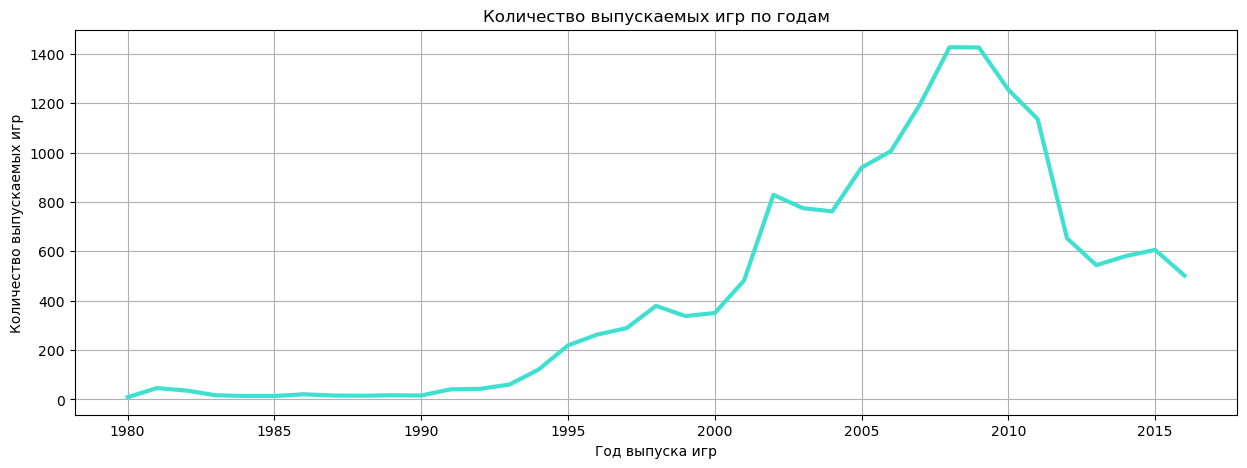

In [45]:
(games
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .query('year_of_release > 0')
    .plot(figsize=(15,5), grid=True, legend=False, linewidth=3, color='turquoise')
)
plt.title('Количество выпускаемых игр по годам')
plt.ylabel('Количество выпускаемых игр')
plt.xlabel('Год выпуска игр');

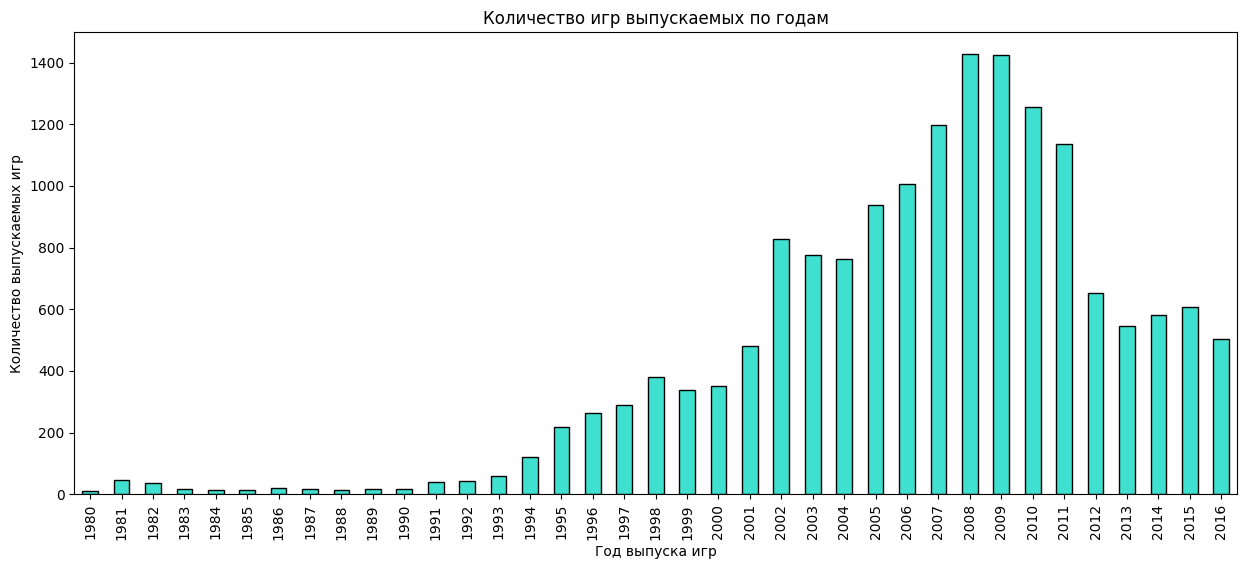

In [42]:
# построим гистограмму распределения количества выпускаемых игр по годам
(games
     .groupby('year_of_release')['name'].count()
     .plot(y='name', kind='bar',figsize=(15,6),
      title = 'Количество игр выпускаемых по годам', ec='black', color='turquoise')
)
plt.ylabel('Количество выпускаемых игр')
plt.xlabel('Год выпуска игр');

- Мировая игровая индустрия начала активно развиваться после 1994 года, количество выпускаемых игр регулярно увеличивалось вплоть до международного экономического кризиса 2008 года.
- В 2008-2009 годы игровая индустрия была в стадии стагнации, новые игры не выпускали, но продажи не падали.
- На графике заметен нисходящий тренд после 2010 года, который говорит о снижении продаж по сравнению с предыдущими периодами.

### Посмотрим как менялись продажи по игровым платформам. 

1. Выберем платформы с наибольшими суммарными продажами;
2. Построим распределение по годам;
3. Посмотрим на жизненный цикл игровых платформ.

In [46]:
#Суммарные продажи у каждой платформы
(games
    .groupby(by='platform')
    .agg({'total_sales':'sum'})
    .sort_values(by='total_sales', ascending=False)
    .head(12)
    .reset_index()
)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


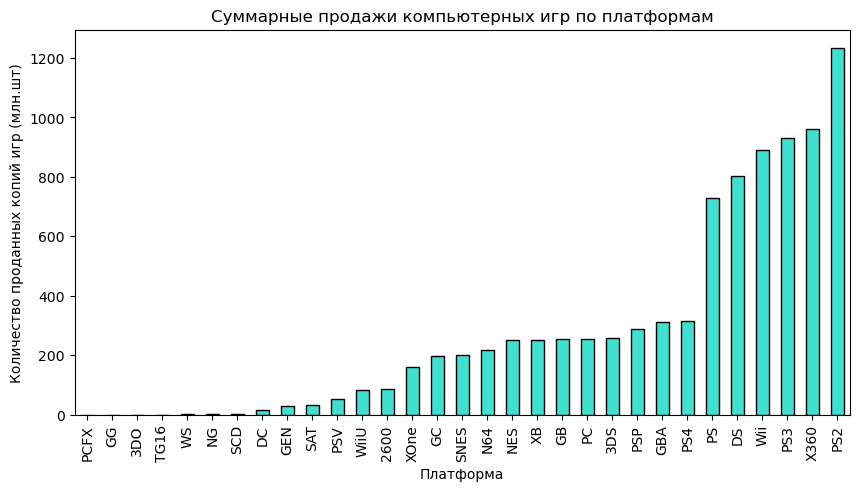

In [47]:
(games
    .groupby('platform')['total_sales']
    .sum().sort_values()
    .plot(y='total_sales', kind='bar',figsize=(10,5),
    title = 'Суммарные продажи компьютерных игр по платформам', ec='black', color='turquoise')
    .set(xlabel = 'Платформа', ylabel = 'Количество проданных копий игр (млн.шт)')
);

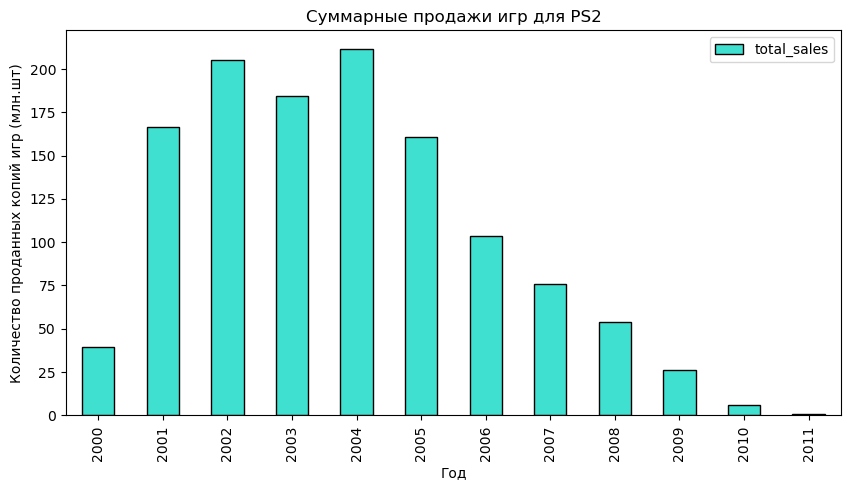

In [48]:
#суммарные продажи по годам для PS2
(games
    .query('platform=="PS2"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для PS2');

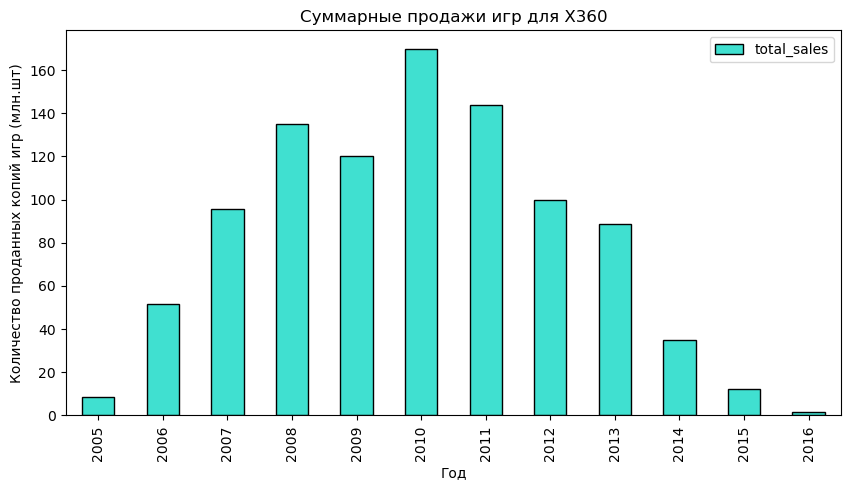

In [49]:
#суммарные продажи по годам для X360
(games
    .query('platform=="X360"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для X360');

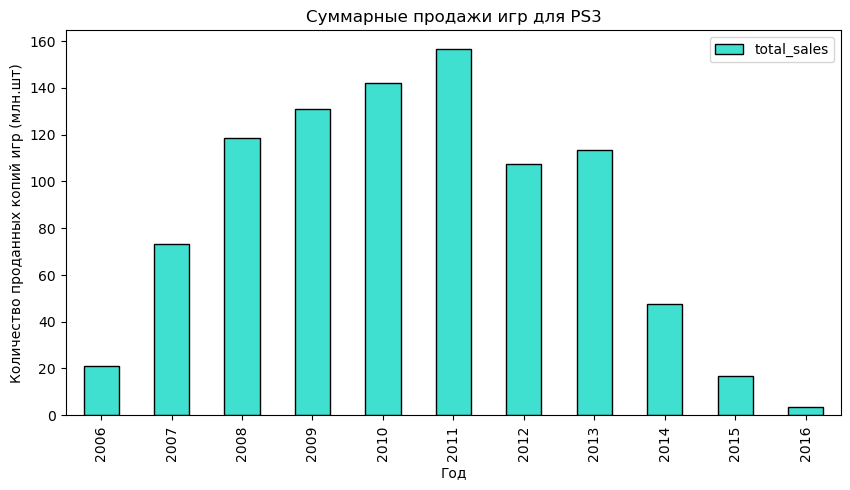

In [50]:
#суммарные продажи по годам для PS3
(games
    .query('platform=="PS3"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для PS3');

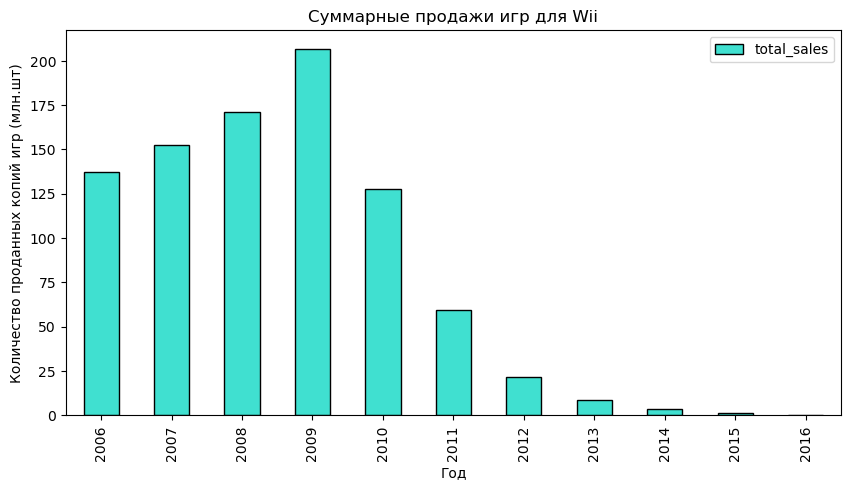

In [51]:
#суммарные продажи по годам для Wii
(games
    .query('platform=="Wii"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для Wii');

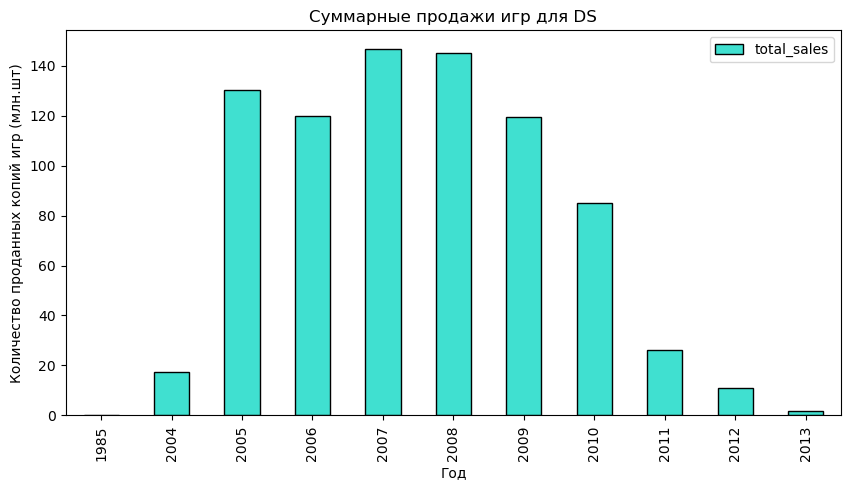

In [52]:
#суммарные продажи по годам для DS
(games
    .query('platform=="DS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для DS');

In [53]:
games.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_ESRB,0.02


In [54]:
games = games.drop(games[games['name'] == 'Strongest Tokyo University Shogi DS'].index)

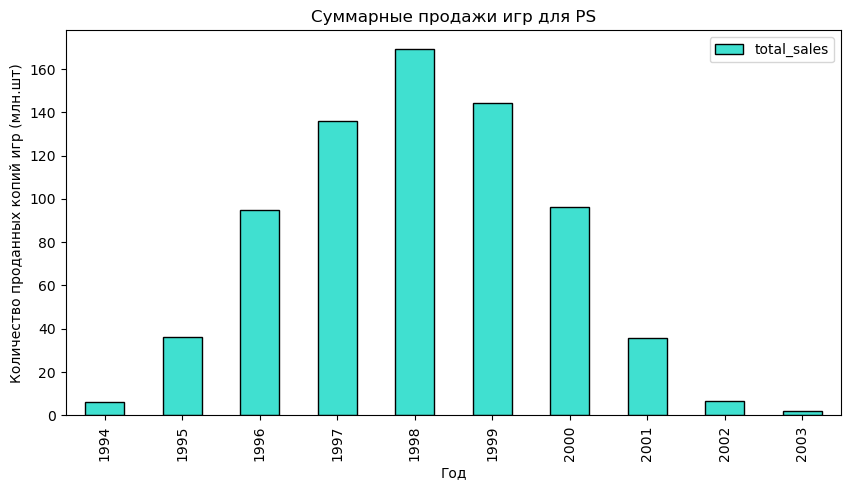

In [55]:
#суммарные продажи по годам для PS
(games
    .query('platform=="PS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для PS');

In [56]:
#1
ps2=games.query('platform=="PS2"')
ps2_min=ps2['year_of_release'].min()
ps2_max=ps2['year_of_release'].max()
ps2_diff=ps2_max-ps2_min
#2
x360=games.query('platform=="X360"')
x360_min=x360['year_of_release'].min()
x360_max=x360['year_of_release'].max()
x360_diff=x360_max-x360_min
#3
ps3=games.query('platform=="PS3"')
ps3_min=ps3['year_of_release'].min()
ps3_max=ps3['year_of_release'].max()
ps3_diff=ps3_max-ps3_min
#4
wii=games.query('platform=="Wii"')
wii_min=wii['year_of_release'].min()
wii_max=wii['year_of_release'].max()
wii_diff=wii_max-wii_min
#5
ds=games.query('platform=="DS"')
ds_min=ds['year_of_release'].min()
ds_max=ds['year_of_release'].max()
ds_diff=ds_max-ds_min
#6
ps=games.query('platform=="PS"')
ps_min=ps['year_of_release'].min()
ps_max=ps['year_of_release'].max()
ps_diff=ps_max-ps_min

mean=(ps2_diff+x360_diff+ps3_diff+wii_diff+ds_diff+ps_diff)/6
print('Средний жизненный цикл игровой платформы: ',mean, 'лет.')

Средний жизненный цикл игровой платформы:  10.0 лет.


### Возьмем данные за актуальный период, чтобы в дальнейшем построить прогноз на 2017 год.

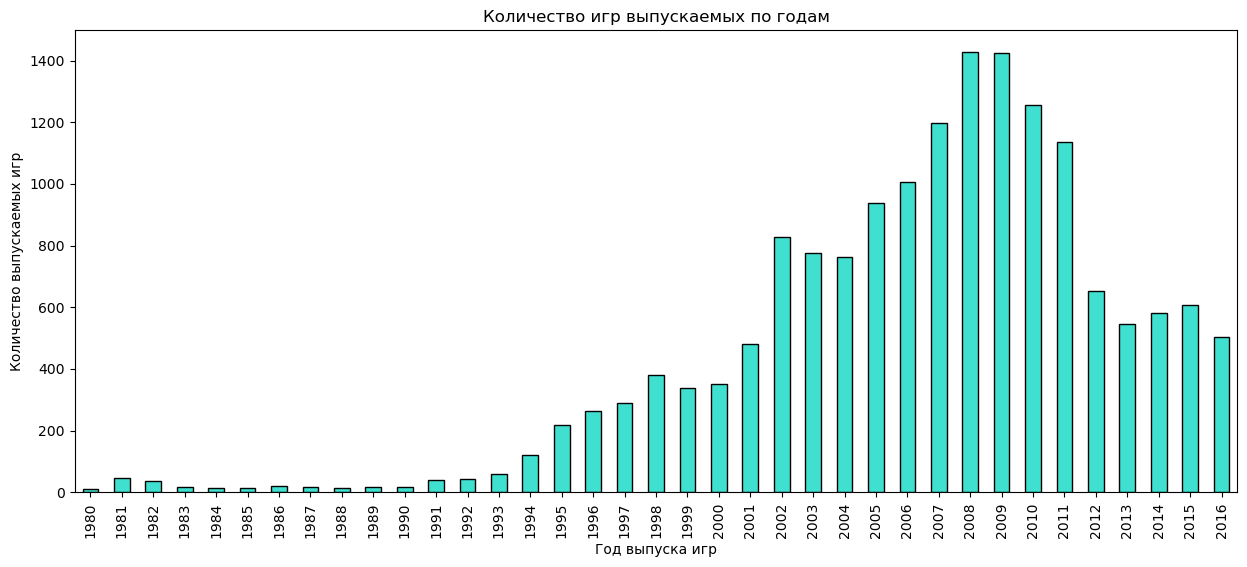

In [57]:
# построим гистограмму распределения количества выпускаемых игр по годам
(games
     .groupby('year_of_release')['name'].count()
     .plot(y='name', kind='bar',figsize=(15,6),
      title = 'Количество игр выпускаемых по годам', ec='black', color='turquoise')
)
plt.ylabel('Количество выпускаемых игр')
plt.xlabel('Год выпуска игр');

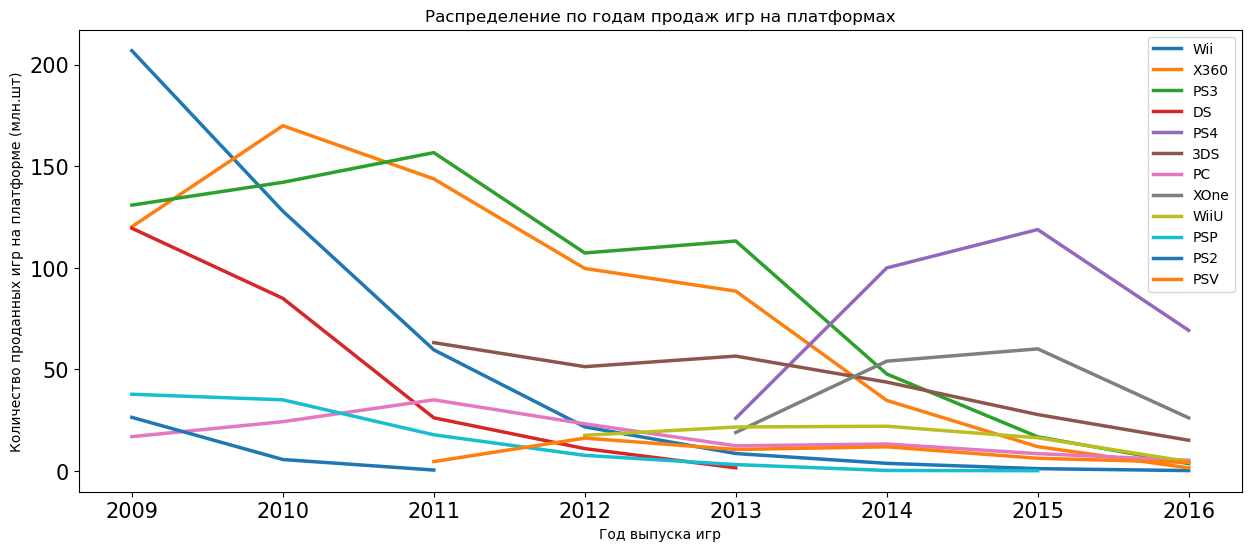

In [58]:
# построим график распределения

ax = plt.gca()

platforms = games.query('year_of_release >= 2009')['platform'].unique().tolist()
for platforms in platforms:
    plot = games.query('platform == @platforms').query('year_of_release >= 2009')\
    .groupby('year_of_release')['total_sales'].sum()\
    .plot(x='year_of_release', y='total_sales', style='-', kind='line', fontsize=15,\
          linewidth=2.5,label=platforms, ax=ax, figsize=(15,6))
    plt.title('Распределение по годам продаж игр на платформах')
    plt.ylabel('Количество проданных игр на платформе (млн.шт)')
    plt.xlabel('Год выпуска игр')    
    plt.legend(platforms)
ax.legend(prop={'size': 10}, bbox_to_anchor=(1.0, 1.0));

In [60]:
forecast = games.query('year_of_release >= 2014')
forecast

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_ESRB,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_ESRB,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01


1. С 2009 по 2016 год наблюдается нисходящая тенденция потребительского спроса и как следствие снижение количества выпускаемых студиями игр. В 2016 году заметно значительное падение продаж, возможно оно связано с тем фактом, что у нас данные за неполный год.

2. На конец 2016 года лидерами игровых платформ являются PlayStation 4 - 2013 года выпуска, Xbox One - 2013 года выпуска и Nintendo 3DS - 2011 года выпуска. Исходя из наблюдения жизненного цикла игровых платформ, в ближайшие годы они должны стать весьма популярными, к тому же развитие платформ идет обычно постепенно по нарастающей, поэтому есть смысл взять последние 2-3 года для того, чтобы сделать прогноз на 2017 год. Остановимся на  периоде 2014-2016 годов.

3. Создадим новый датафрейм "forecast", в котором будет наша выборка данных за актуальный период (2014-2016 годы). Дальнейшую работу будем строить на ней.

### Посмотрим на динамику продаж игр для лидирующих игровых платформ.

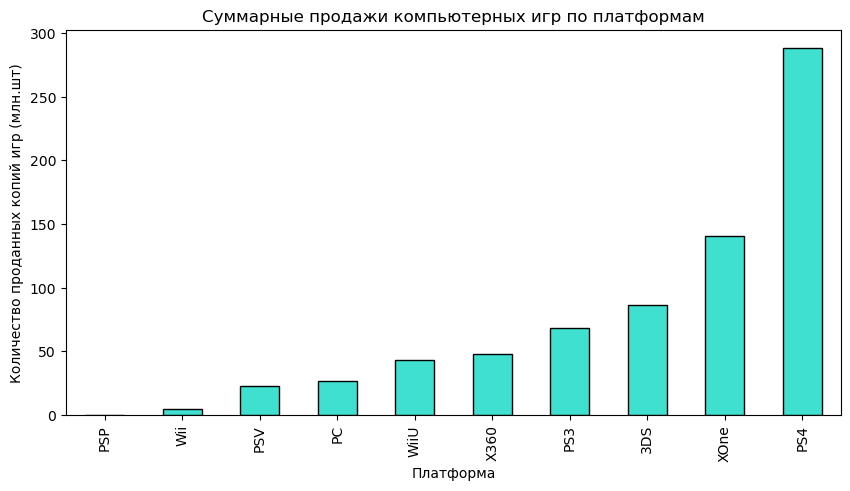

In [61]:
(forecast
    .groupby('platform')['total_sales']
    .sum().sort_values()
    .plot(y='total_sales', kind='bar',figsize=(10,5),
    title = 'Суммарные продажи компьютерных игр по платформам', ec='black', color='turquoise')
    .set(xlabel = 'Платформа', ylabel = 'Количество проданных копий игр (млн.шт)')
);

In [62]:
#Суммарные продажи по платформам в актуальном периоде
(forecast
    .groupby(by='platform')
    .agg({'total_sales':'sum'})
    .sort_values(by='total_sales', ascending=False)
    .head(12)
    .reset_index()
)

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


1. Из графика видно, что в нашем актуальном периоде пользуются спросом следующие игровые платформы:
- PS4 вышла в 2013 году
- XOne вышла в 2013 году
- 3DS вышла в 2011 году
- PS3 вышла в 2006 году
- X360 вышла в 2005 году
- WiiU вышла в 2012 году
- PC
- PSV вышла в 2011 году
- Wii вышла в 2006 году
- PSP вышла в 2005 году

2. Выделим из них топ-5 популярных:
- PS4 288.15 млн. копий игр
- XOne 140.36 млн. копий игр
- 3DS 86.68 млн. копий игр
- PS3 68.18 млн. копий игр
- X360 48.22 млн. копий игр


Как мы видим, в данный список вошли 3 игровые платформы, согласно жизненному циклу которых, в ближайшие несколько лет они выйдут на пик своей популярности - это PlayStation 4, Xbox One и Nintendo 3DS.

Посмотрим на графики продаж топ 5 платформ за актуальный период

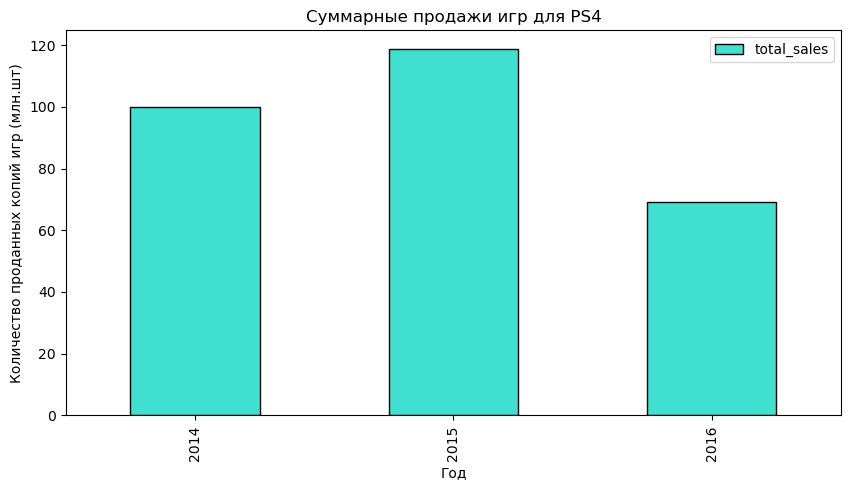

In [63]:
#суммарные продажи по годам для PS4
(forecast
    .query('platform=="PS4"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для PS4');

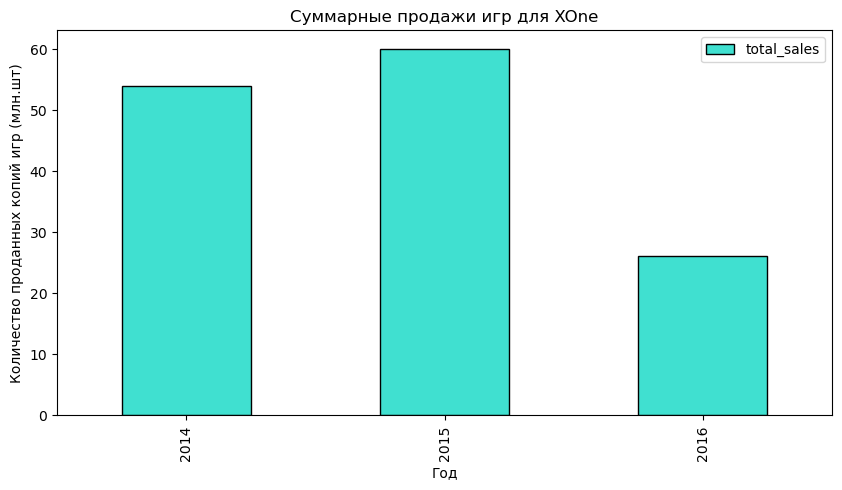

In [64]:
#суммарные продажи по годам для XOne
(forecast
    .query('platform=="XOne"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для XOne');

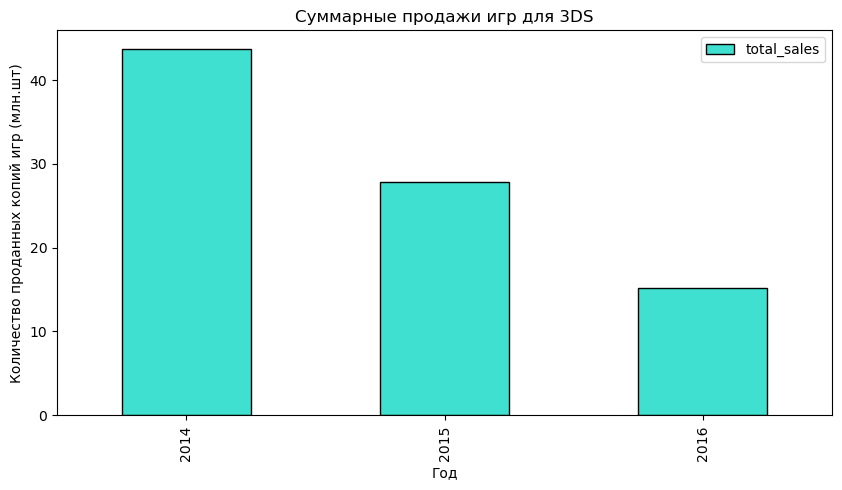

In [65]:
#суммарные продажи по годам для 3DS
(forecast
    .query('platform=="3DS"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для 3DS');

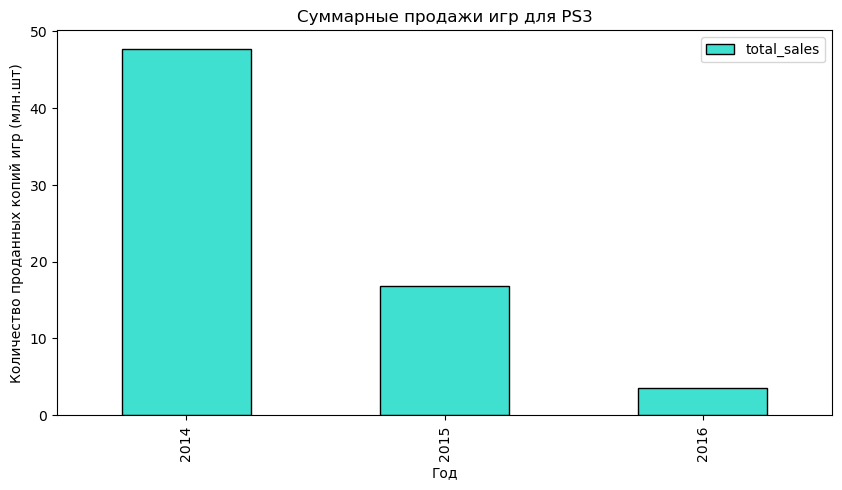

In [66]:
#суммарные продажи по годам для PS3
(forecast
    .query('platform=="PS3"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для PS3');

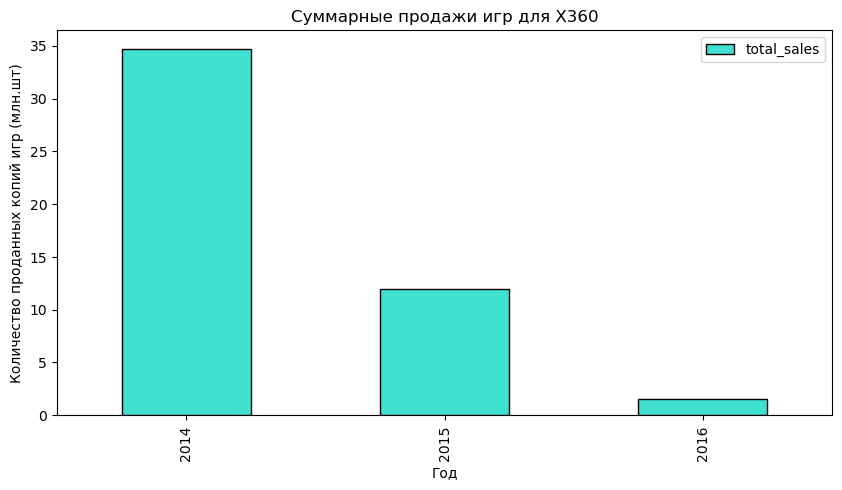

In [67]:
#суммарные продажи по годам для X360
(forecast
    .query('platform=="X360"')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc=sum)
    .plot(figsize=(10,5), kind='bar', ec='black', color='turquoise')
)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр (млн.шт)')
plt.title('Суммарные продажи игр для X360');

Потенциально прибыльными игровыми платформами можно с уверенностью назвать PS4 и XOne т.к. по ним не было просадки в 2015 году, спрос идёт по нарастающей, их популярность ещё впереди.   

По платформам X360 и PS3 наблюдается нисходящий тренд, что говорит об их приближающемся закате на рынке игровых платформ.  
Странно, что в список аутсайдеров попадает и 3DS, возможно была проведена слабая маркетинговая кампания, либо сильно завышена цена и потенциальные покупатели просто в ожидании снижения цен. Также, это может быть связано с тем, что рынок игровых консолей сокращается, поскольку активно расширяются рынки социальных игр и игр для мобильных устройств. Игрокам не нравится делать много действий, чтобы получить желаемое, они хотят играть здесь и сейчас, к тому же сейчас важно быть в курсе последних популярных новинок, чего возможно не может предоставить в полной мере своему потребителю 3DS.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

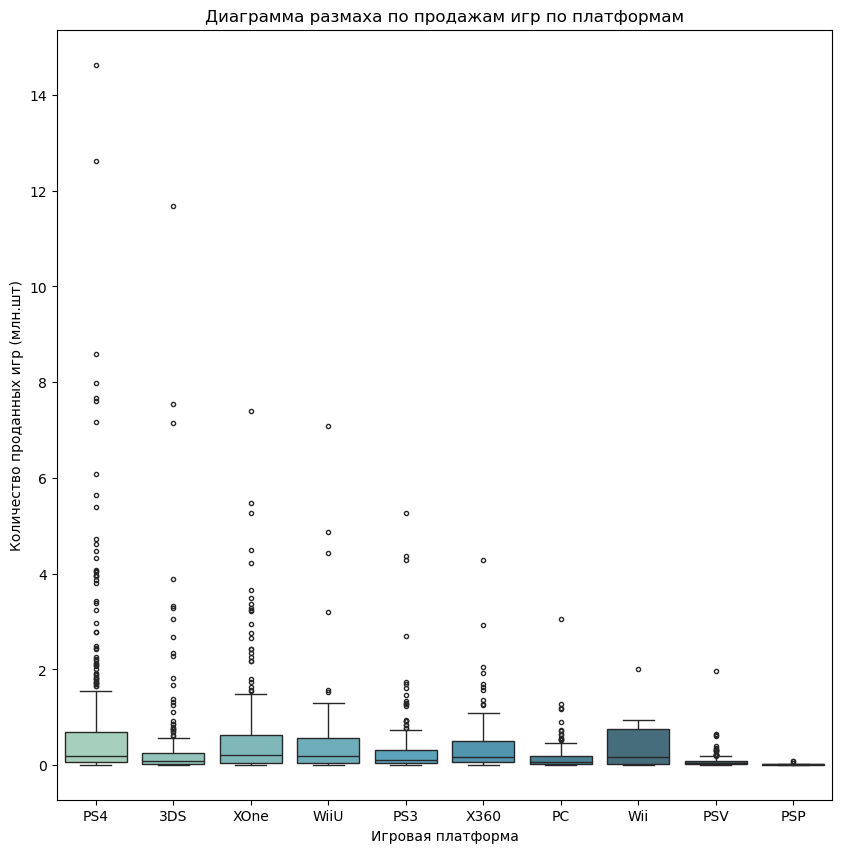

In [68]:
# строим диаграммы размаха для платформ из нового топ-листа
plt.figure(figsize=(10,10))
sns.boxplot (x = 'platform', y = 'total_sales', data = forecast, palette='GnBu_d', fliersize=3)
plt.xlabel('Игровая платформа')
plt.ylabel('Количество проданных игр (млн.шт)')
plt.title('Диаграмма размаха по продажам игр по платформам');

In [69]:
#forecast1 = forecast.query('year_of_release >= 2014').groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()
#forecast1

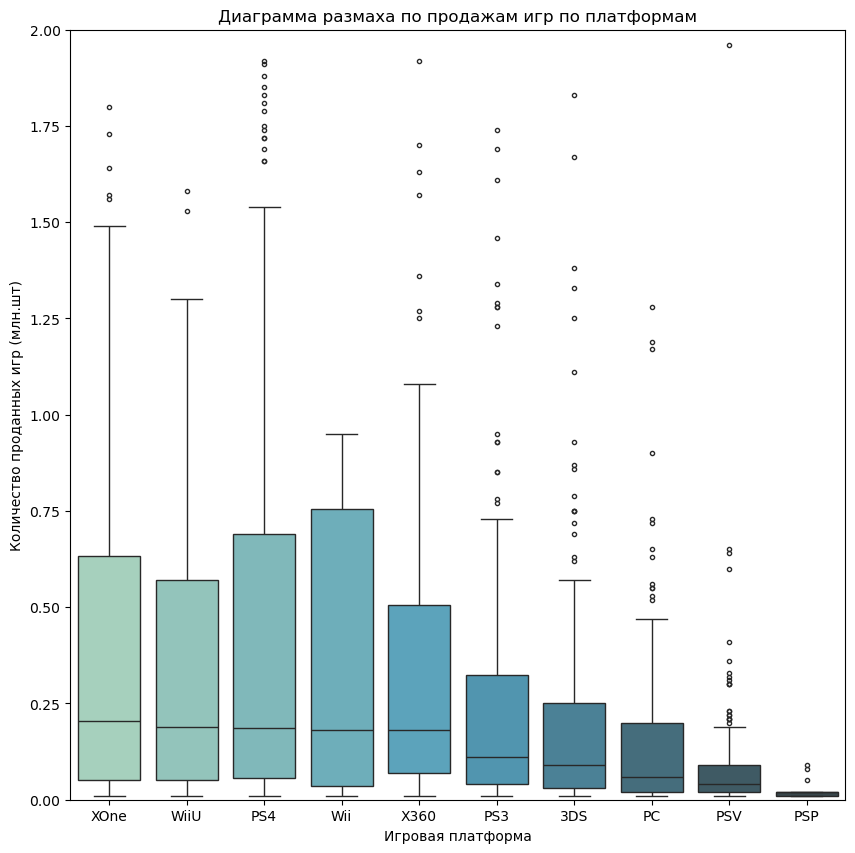

In [70]:
# отсортируем игровые платформы по убыванию медианы глобальных продаж
platform_sorted = (forecast
                 .groupby('platform')['total_sales']
                 .agg('median')
                 .sort_values(ascending=False)
                 .index
                )
# строим диаграммы размаха для платформ из нового топ-листа
plt.figure(figsize=(10,10))
sns.boxplot (x = 'platform', y = 'total_sales', data = forecast, order = platform_sorted, palette='GnBu_d', fliersize=3)
plt.xlabel('Игровая платформа')
plt.ylabel('Количество проданных игр (млн.шт)')
plt.title('Диаграмма размаха по продажам игр по платформам')
plt.ylim(0,2);

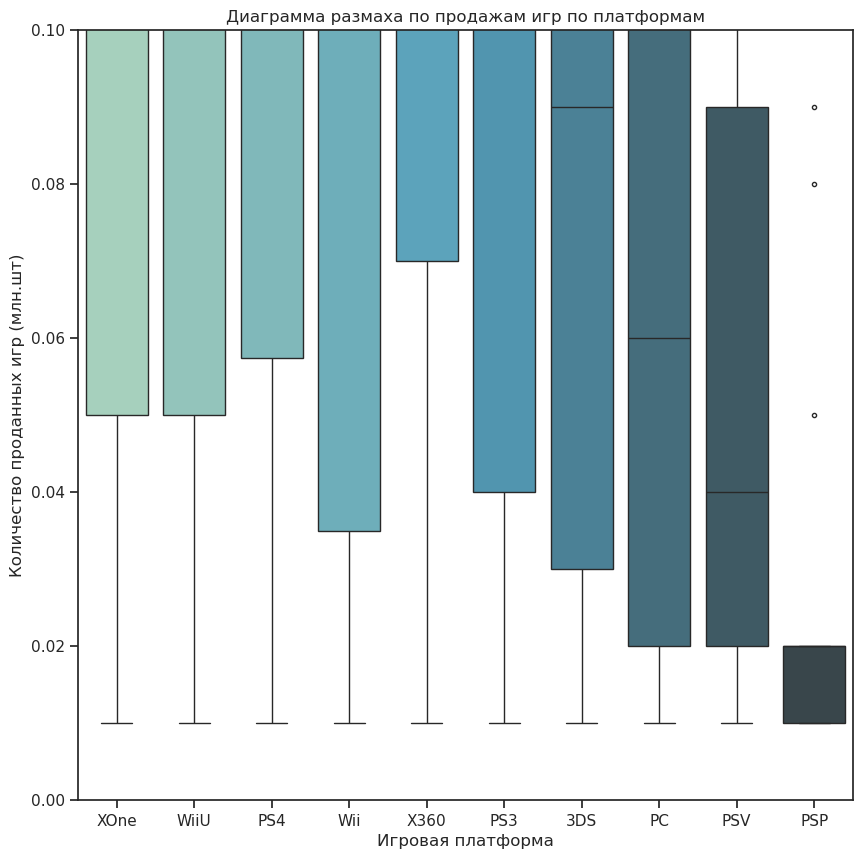

In [71]:
plt.figure(figsize=(10,10))
sns.set(style="ticks")
sns.boxplot(x = 'platform', y = 'total_sales', data = forecast, order = platform_sorted, palette='GnBu_d', fliersize=3)
# order = genres_sorted - для расстановки ящиков в порядке убывания глобальных продаж
plt.xlabel('Игровая платформа')
plt.ylabel('Количество проданных игр (млн.шт)')
plt.title('Диаграмма размаха по продажам игр по платформам')
plt.ylim(0,0.10);

1. На графике видно, что медиана находится ближе к нижней части ящиков и усы короче на нижних концах ящиков, распределение скошено вправо. К тому же по всем игровым платформам есть выбросы, которые сильно удалены от медианного значения, это редкие игры, продажи которых были нетипично велики.
2. Правостороннее распределение говорит о преимущественно больших объёмах продаж игр. Например, одну игру продали в количестве 50 тыс копий, вторую - 100 тыс копий, третью - 2 миллиона копий и т.д. В ящике мы видим разброс этих значений. Что касается продажи игр, конечно в идеале каждую игру необходимо рассматривать индивидуально, ведь многое зависит от того насколько сложным или простым является процесс создания и оптимизации конкретной игры под ту или иную платформу и операционную систему соответственно. Но в данной ситуации не имеет смысла в это углубляться. Итак, самые прибыльние платформы по "ящикам с усами": XOne, WiiU, PS4, Wii, X360, PS3. Аутсайдеры по объёмам продаж   "карманные" игровые приставки PSV и PSP. Платформы PS4 и XOne совсем недавно на рынке, однако по ним уже наблюдается всплеск продаж.

### Сравним выводы по продажам игр для PS4 с продажами игр для XOne

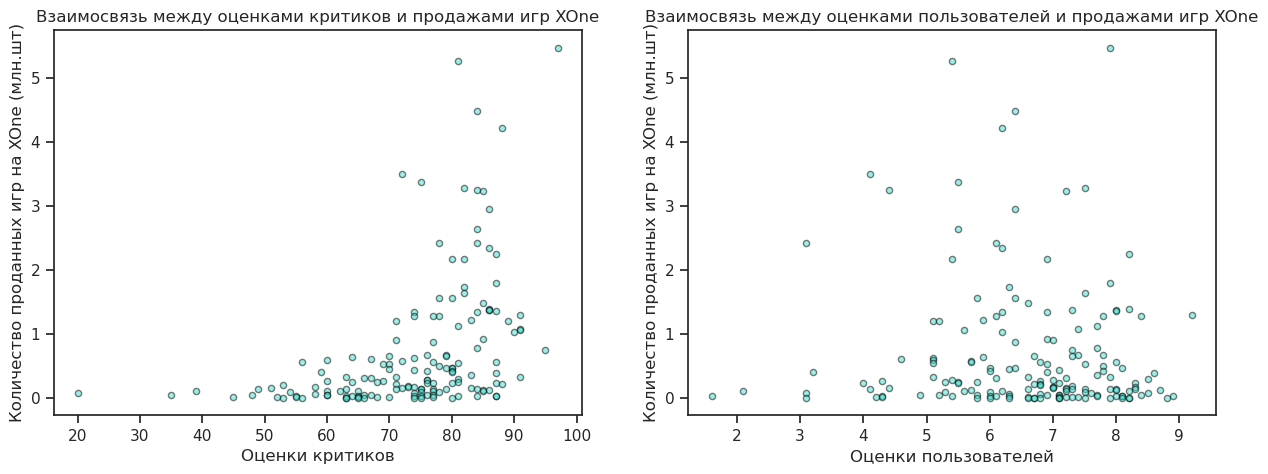

In [75]:
rows = 1
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,5))
score_list = ['critic_score', 'user_score']
forecast_xone = forecast.query('platform == "XOne"')

count = 0
for r in range(rows):
    for i in range(cols):
        title_dict = {'critic_score':'Взаимосвязь между оценками критиков и продажами игр XOne', 'user_score':'Взаимосвязь между оценками пользователей и продажами игр XOne'}
        xlabel_dict = {'critic_score':'Оценки критиков', 'user_score':'Оценки пользователей'}
        ax = forecast_xone.plot(kind = 'scatter', x = score_list[count], y = 'total_sales',\
                            ax=axes[i], ec='black', alpha = 0.5, color='turquoise', title = title_dict[score_list[count]])\
        .set(xlabel = xlabel_dict[score_list[count]], ylabel = 'Количество проданных игр на XOne (млн.шт)')
        count += 1

In [80]:
# отсортируем игровые платформы по продажам и выведем их
top_sales = forecast.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)
top_sales.head(7)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
Name: total_sales, dtype: float64

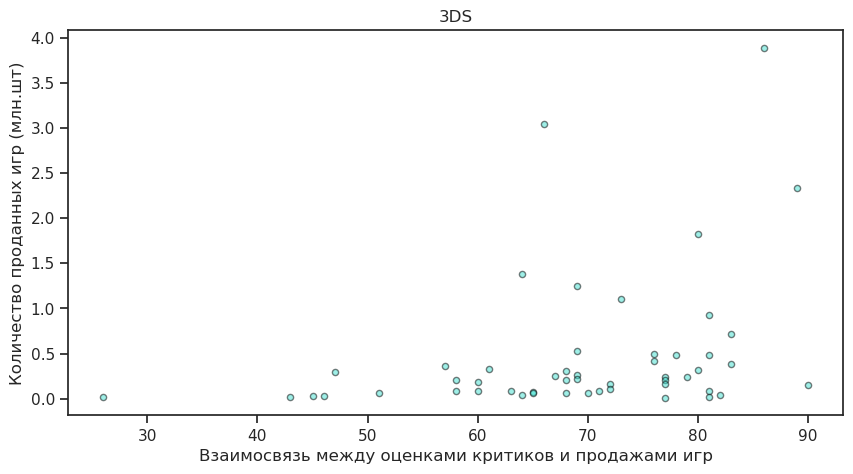

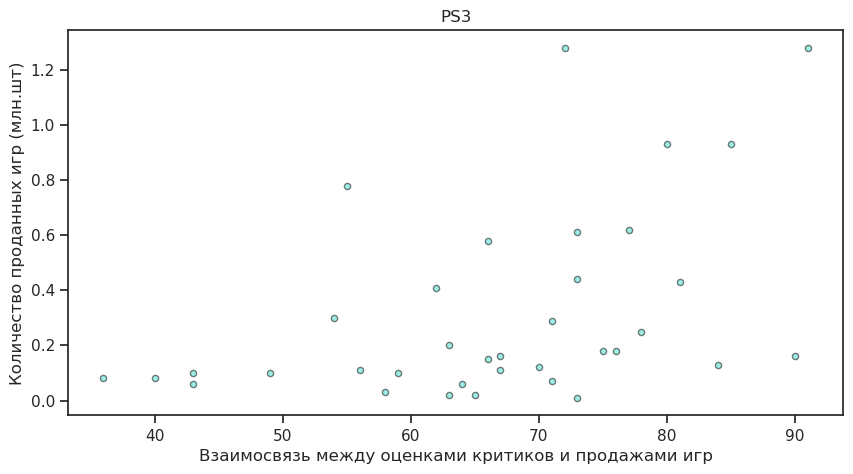

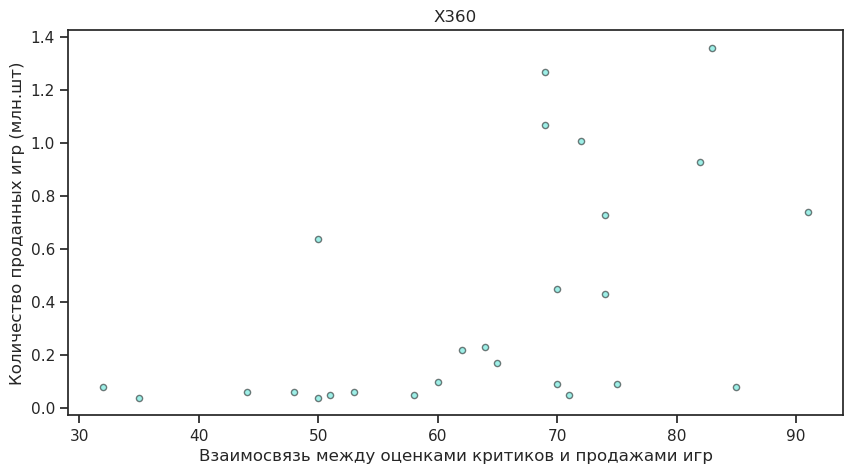

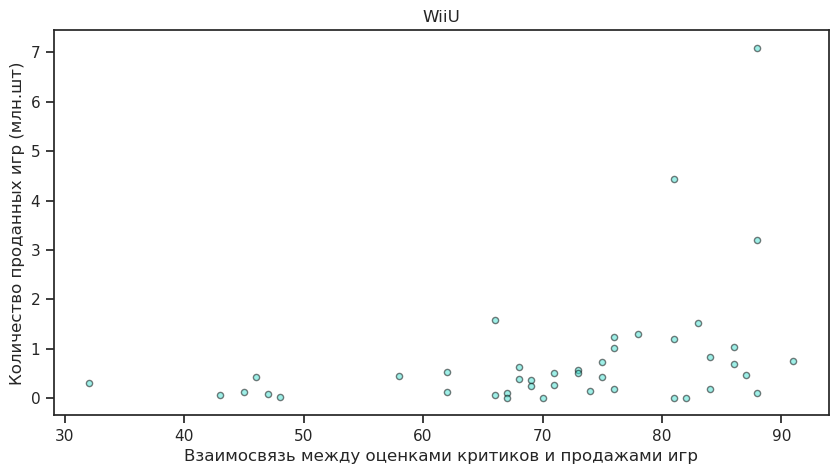

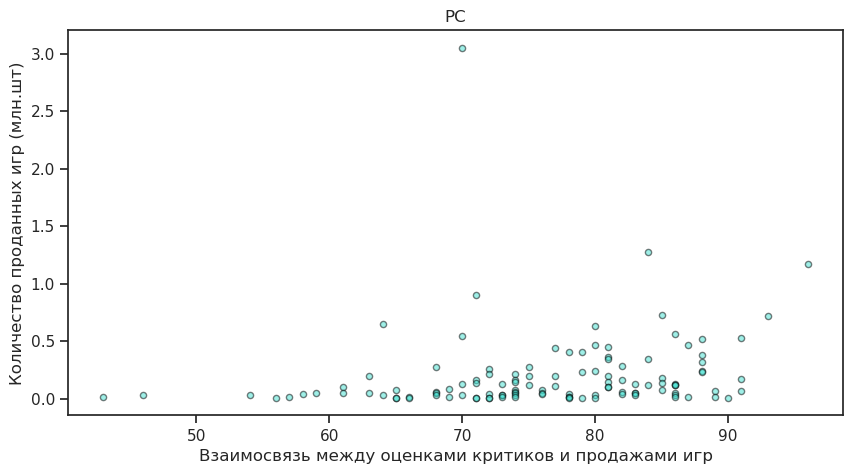

In [81]:
platform = ['3DS','PS3','X360','WiiU','PC']
for i in platform:
    top_sales = forecast.query('platform==@i')
    top_sales.plot(x='critic_score', y='total_sales', figsize=(10,5), alpha=0.5, kind='scatter', color='turquoise', ec='black', legend=True)
    plt.ylabel('Количество проданных игр (млн.шт)')
    plt.xlabel('Взаимосвязь между оценками критиков и продажами игр')
    plt.title(i)

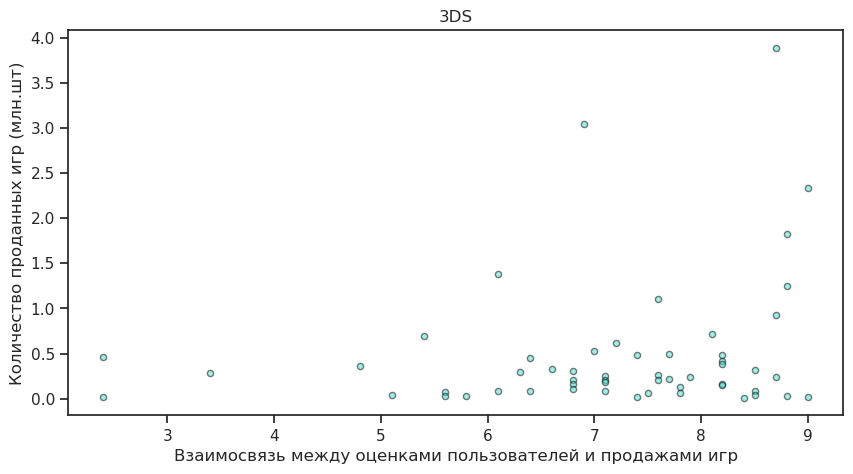

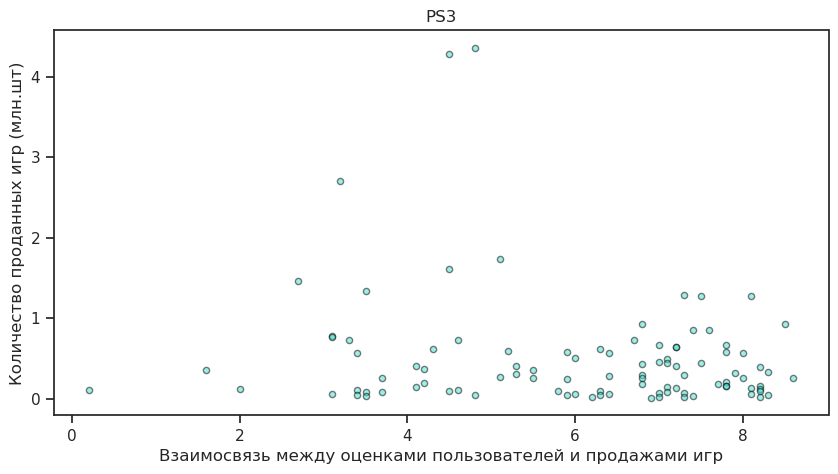

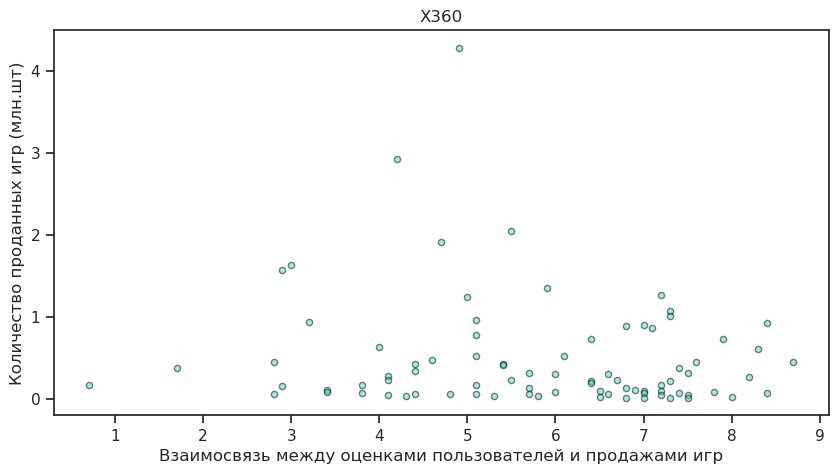

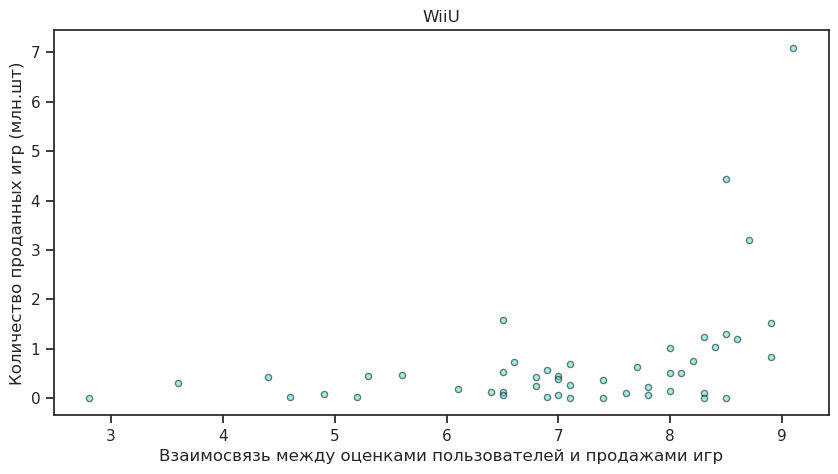

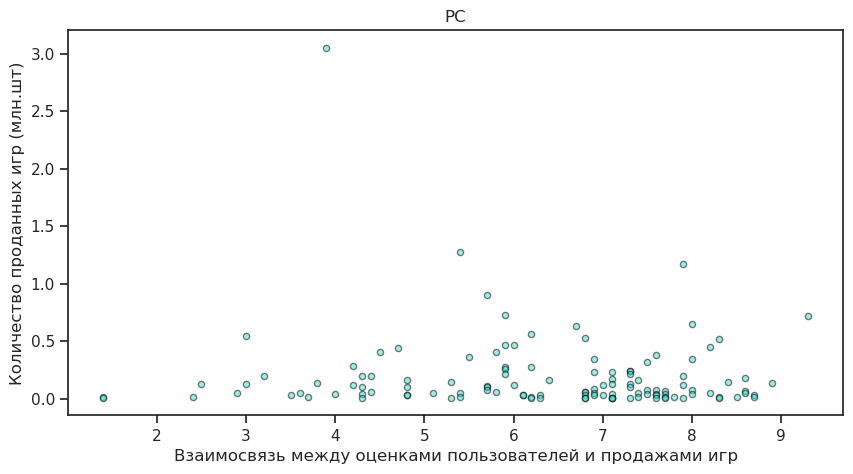

In [82]:
platform = ['3DS','PS3','X360','WiiU','PC']
for i in platform:
    top_sales = forecast.query('platform==@i')
    top_sales.plot(x='user_score', y='total_sales', figsize=(10,5), alpha=0.5, kind='scatter', color='turquoise', ec='black', legend=True)
    plt.ylabel('Количество проданных игр (млн.шт)')
    plt.xlabel('Взаимосвязь между оценками пользователей и продажами игр')
    plt.title(i)

- по платформе 'PS4' наблюдается слабая взаимосвязь (0,5) между оценками критиков и объёмами продаж и очень слабая взаимосвязь (-0.04) между оценками пользователей и объёмами продаж;
- по платформе 'XOne' наблюдается слабая взаимосвязь (0,4) между оценками критиков и объёмами продаж и очень слабая взаимосвязь (-0.07) между оценками пользователей и объёмами продаж;
- по платформе '3DS' наблюдается слабая взаимосвязь (0,3) между оценками критиков и объёмами продаж и очень слабая взаимосвязь (0,2) между оценками пользователей и объёмами продаж;
- по платформе 'PS3'наблюдается слабая взаимосвязь (0,4) между оценками критиков и объёмами продаж и отсутствие взаимосвязи (-0,1) между оценками пользователей и объёмами продаж;
- по платформе 'X360'наблюдается средняя взаимосвязь (0,5) между оценками критиков и объёмами продаж и отсутствие взаимосвязи (-0,1) между оценками пользователей и объёмами продаж;
- по платформе 'WiiU'наблюдается слабая взаимосвязь (0,3) между оценками критиков и объёмами продаж и слабая взаимосвязь (0,4) между оценками пользователей и объёмами продаж;
- по платформе 'PC'очень слабая взаимосвязь (0,1) между оценками критиков и объёмами продаж и отсутствие взаимосвязи (-0,1) между оценками пользователей и объёмами продаж. 

Таким образом, можно сделать обобщенный вывод о том, что в среднем, оценки профессиональных критиков не влияют на успех игр и не являются определяющим фактором для продаж.


Оценки пользователей никак не влияют на продажи. Возможно это связано с несколькими факторами:
- пользователи часто оценивают игры на старте, после чего разработчики могут вносить какие-то исправления и дополнения, но оценка недовольного пользователя остается прежней;
- современное поколение сейчас старается найти свою индивидуальность и не следуют за мнением большинства т.е. если игра понравилась тысячам рецензентов, это не гарантирует того, что игра понравится определенному игроку;
- на искажение оценок пользователей часто может влиять человеческий фактор в виде настроения игрока, а также его внутренних субъективных убеждений о бренде, создателях, игровой платформе.

### Посмотрим на общее распределение игр по жанрам. 

1. Какие особенности есть у самых прибыльных жанров.
2. Выделяются ли жанры с высокими и низкими продажами.

In [84]:
forecast_genre = (forecast.groupby('genre')
                    .agg(
                        count = ('platform', 'count'),
                        sales_sum = ('total_sales', 'sum'),
                        sales_mean = ('total_sales', 'mean'),
                        sales_median = ('total_sales', 'median'))
                    .reset_index()
                )
display(forecast_genre.sort_values('sales_sum', ascending=False))

,genre,count,sales_sum,sales_mean,sales_median
0,Action,619,199.36,0.322068,0.090
8,Shooter,128,170.94,1.335469,0.515
10,Sports,161,109.48,0.680000,0.180
7,Role-Playing,221,101.44,0.459005,0.110
3,Misc,113,37.55,0.332301,0.090
2,Fighting,60,28.22,0.470333,0.125
6,Racing,69,27.52,0.398841,0.090
4,Platform,38,18.09,0.476053,0.140
1,Adventure,185,17.55,0.094865,0.030
9,Simulation,44,13.13,0.298409,0.100


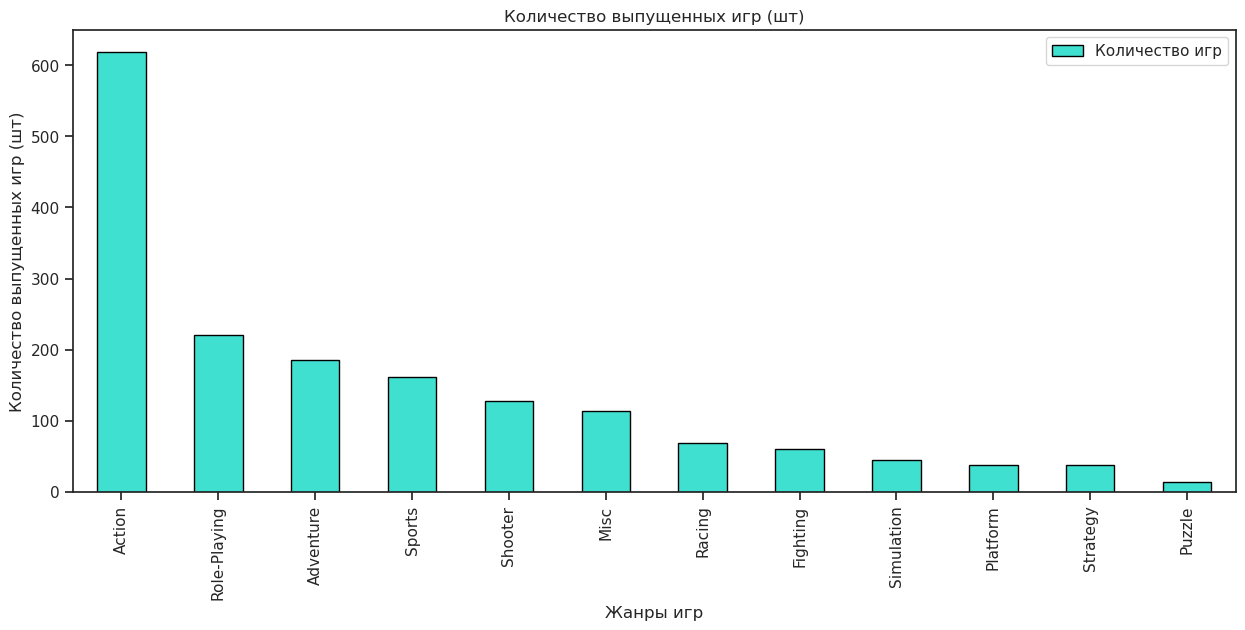

In [85]:
# построим график с распределением по жанрам количества выпущенных игр

(forecast
    .pivot_table(index= 'genre', values='name', aggfunc='count')
    .sort_values(by = 'name', ascending = False)
    .plot(kind='bar',figsize=(15,6), color='turquoise',ec='black', width=0.5)
)

plt.xlabel('Жанры игр')
plt.ylabel('Количество выпущенных игр (шт)')
plt.title('Количество выпущенных игр (шт)')
plt.legend(['Количество игр']);

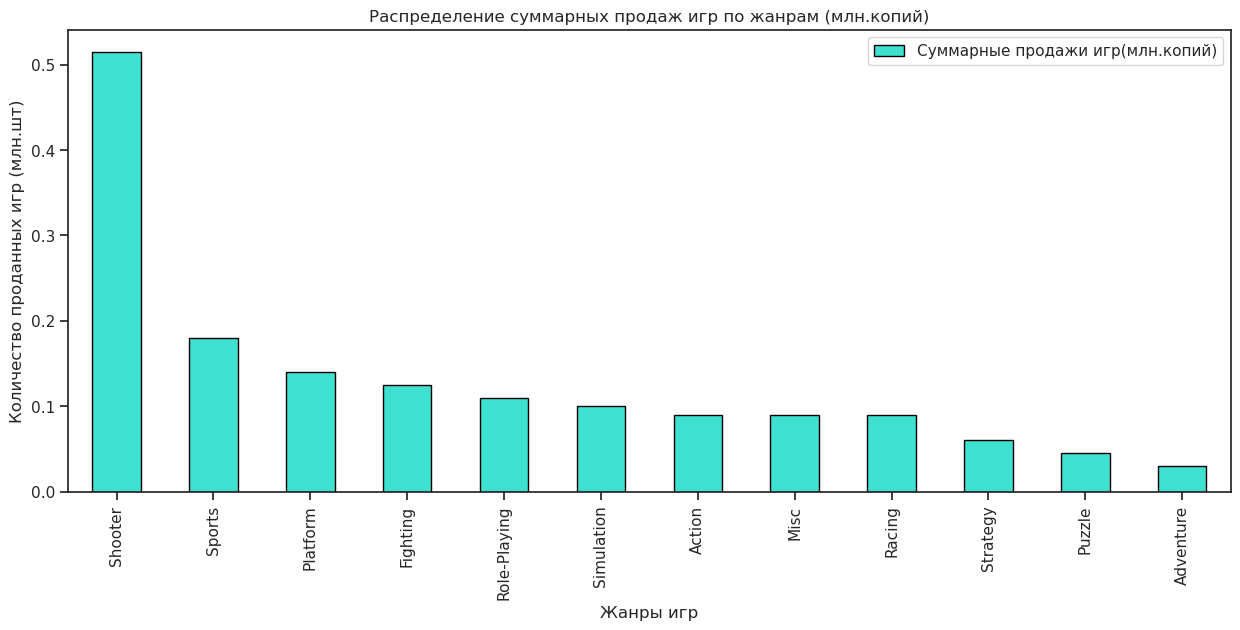

In [86]:
# построим график с распределением по жанрам количества выпущенных игр
(forecast
    .pivot_table(index= 'genre', values='total_sales', aggfunc='median')
    .sort_values(by = 'total_sales', ascending = False)
    .plot(kind='bar',figsize=(15,6), color='turquoise',ec='black', width=0.5)
)

plt.xlabel('Жанры игр')
plt.ylabel('Количество проданных игр (млн.шт)')
plt.title('Распределение суммарных продаж игр по жанрам (млн.копий)')
plt.legend(['Суммарные продажи игр(млн.копий)']);

1. Уверенную лидирующую позицию среди жанров по количеству выпущенных игр занимает Action - 619 млн. копий игр
2. Количество проданных копий игр в абсолютном значении лидером по прежнему является жанр Action - 199.36 млн. копий. А вот, если взять медиану, которая устойчива к аномальным отклонениям, то уверенную лидирующую позицию среди жанров по продажам занимает жанр Shooter (стрелялки). 

3. Разница между жанрами по количеству выпущенных игр составляет 491 млн. копий, а вот количество продаж разнится не сильно, всего 28.42 млн. копий. Различия в количестве выпущенных игр можно объяснить историей развития жанров, первые игры жанра Action согласно википедии берут свое начало с 1978 года, в то время как первые игры жанра Shooter начали выходить с 1985 года, в индустрии игр разница в 7 лет колоссальная, отсюда и большее количество игр. К тому же возможно, что игр жанра Shooter не так много из-за высокой стоимости их разработки.  

4. Аутсайдером по количеству выпущенных игр можно назвать жанр Puzzle - всего 14 игр, который предтставляет собой головоломки, целью которых является решение логических задач, требующих от игрока задействования логики, стратегии и интуиции. Как известно игры подобного жанра берут начало еще из настолок.

5. Аутсайдером по количеству проданных копий игр можно назвать жанр Adventure, или приключенческая игра - это старый жанр, первые полноценные представители которого появились в 1980-х годах. Основные составляющие геймплея — это исследование мира, решение загадок, сбор полезных предметов и общение со встреченными героями.

Из всего этого можно сделать вывод о том, что игроки больше предпочитают активные жанры игр, нежели размеренные логические.

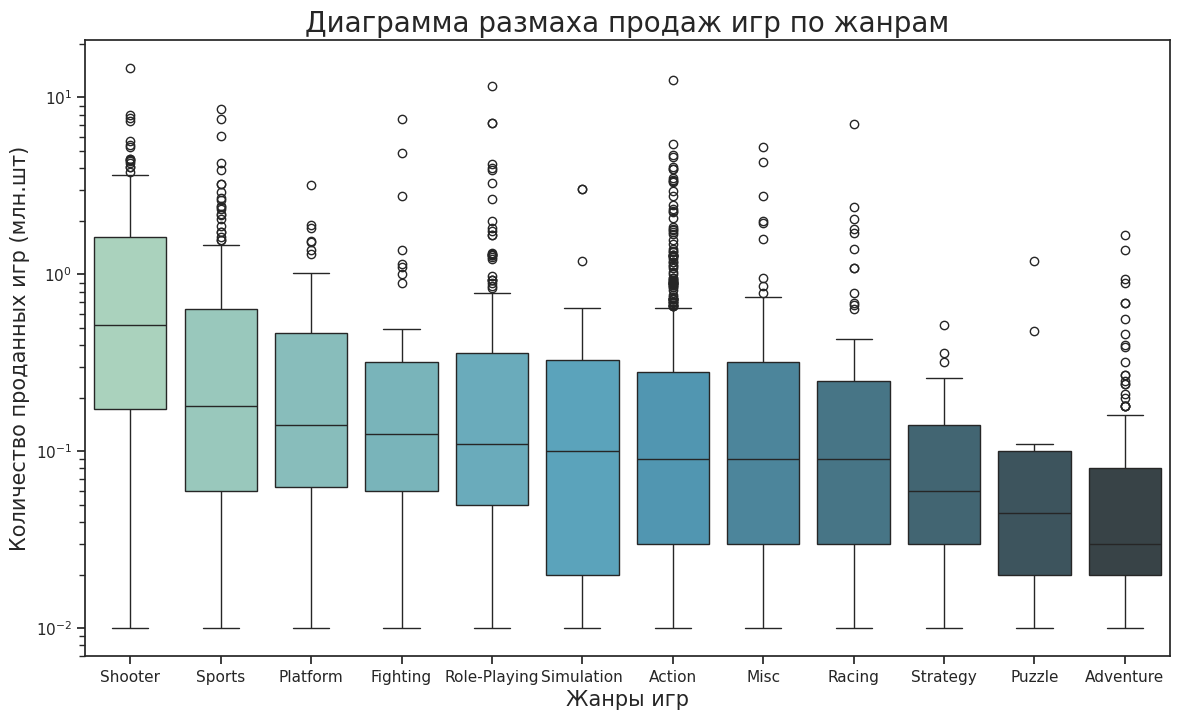

In [87]:
# отсортируем список жанров по убыванию медианы глобальных продаж
forecast_sorted = (forecast
                 .groupby('genre')['total_sales']
                 .agg('median')
                 .sort_values(ascending=False)
                 .index
                )
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data=forecast, y="total_sales", x='genre', order = forecast_sorted, palette='GnBu_d')
ax.set_title('Диаграмма размаха продаж игр по жанрам', fontsize=20)
ax.set_xlabel('Жанры игр', fontsize=15)
ax.set_ylabel('Количество проданных игр (млн.шт)', fontsize=15)
ax.set(yscale="log")
plt.show()

### Вывод по шагу 3

1. Актуальный период для исследования: 2014 - 2016 годы.
2. На конец 2016 года лидерами игровых платформ являются PlayStation 4 - 2013 года выпуска, Xbox One - 2013 года выпуска и Nintendo 3DS - 2011 года выпуска.
3. Средний жизненный цикл игровой платформы около 10 лет. 
4. Игровые платформы набирают свою пиковую популярность в промежутке 4-6 лет своего существования.
5. Оценки критиков некоторым образом влияют на объёмы продаж, но это не единственный фактор. В меньшей степени (или не зависят совсем) объемы продаж от отзывов пользователей. Говорить уверенно о какой-то прямой взаимосвязи между продажами и оценками пользователей или критиков сложно. 
6. Самые полулярные и прибыльные жанры: Action и Shooter.
7. Самые непопулярные и не прибыльные жанры: Puzzle и Adventure.

## Шаг 4. Составим портрет пользователя каждого региона (NA, EU, JP)

### Определим для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5).

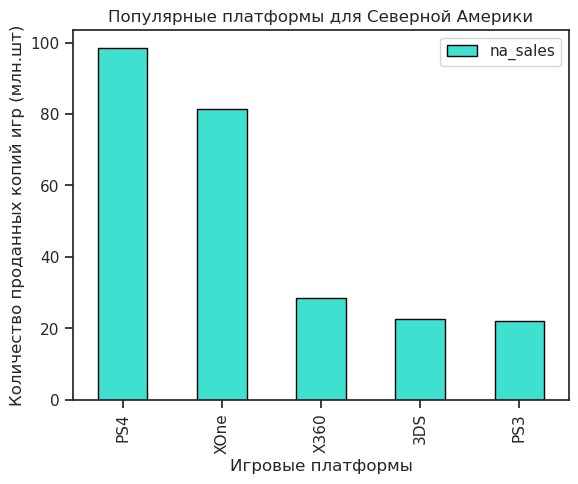

In [88]:
forecast.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color='turquoise', ec='black')
plt.title('Популярные платформы для Северной Америки')
plt.xlabel('Игровые платформы')
plt.ylabel('Количество проданных копий игр (млн.шт)');

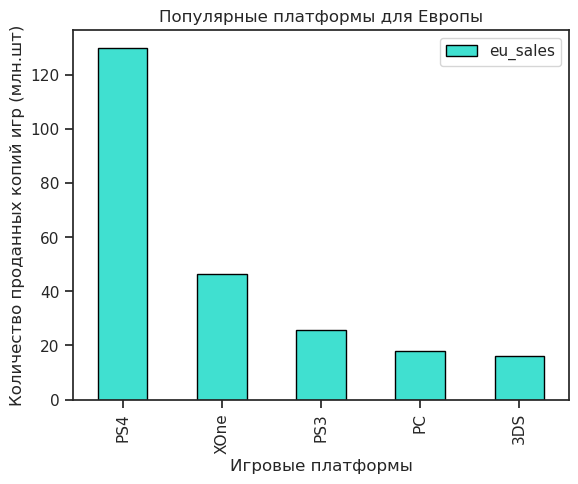

In [89]:
forecast.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', color='turquoise', ec='black')
plt.title('Популярные платформы для Европы')
plt.xlabel('Игровые платформы')
plt.ylabel('Количество проданных копий игр (млн.шт)');

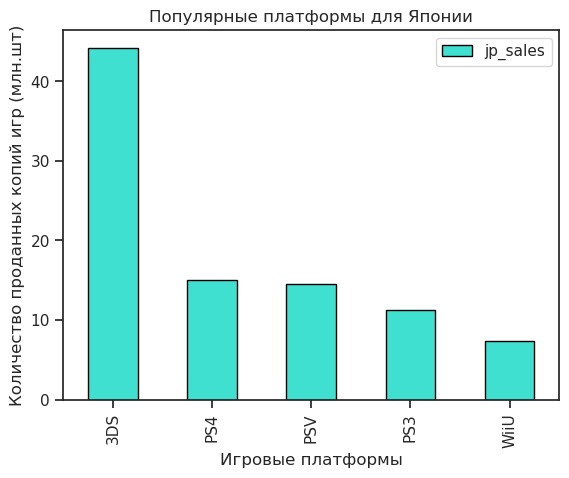

In [90]:
forecast.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color='turquoise', ec='black')
plt.title('Популярные платформы для Японии')
plt.xlabel('Игровые платформы')
plt.ylabel('Количество проданных копий игр (млн.шт)');

Самые популярные платформы в Северной Америке и Европе - PS4 и XOne, в Японии - это 3DS на первом месте и PS4 на втором.

### Определим для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5)

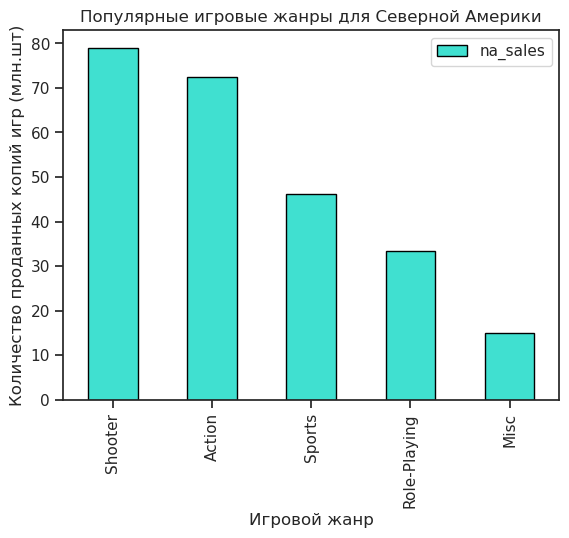

In [91]:
forecast.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color='turquoise', ec='black')
plt.title('Популярные игровые жанры для Северной Америки')
plt.xlabel('Игровой жанр')
plt.ylabel('Количество проданных копий игр (млн.шт)');

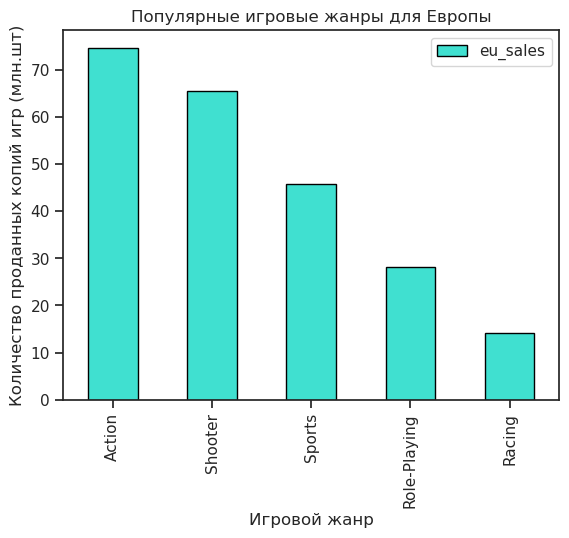

In [92]:
forecast.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', color='turquoise', ec='black')
plt.title('Популярные игровые жанры для Европы')
plt.xlabel('Игровой жанр')
plt.ylabel('Количество проданных копий игр (млн.шт)');

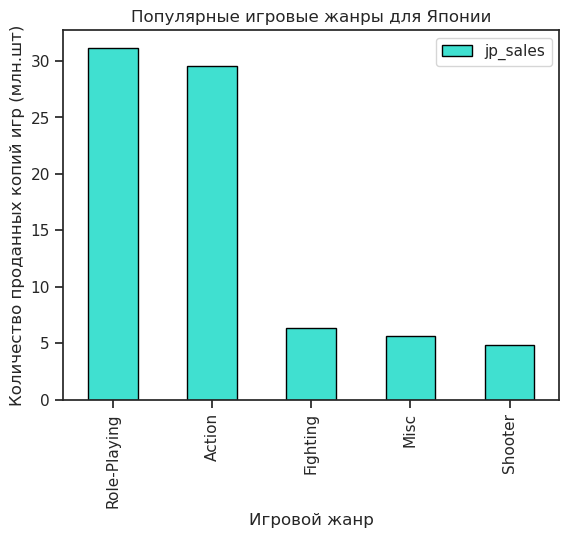

In [93]:
forecast.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color='turquoise', ec='black')
plt.title('Популярные игровые жанры для Японии')
plt.xlabel('Игровой жанр')
plt.ylabel('Количество проданных копий игр (млн.шт)');

In [94]:
top_pl_na = forecast.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head(5)
#выделим платформы не вошедшие в топ-5 по платформам в одну группу "other"
top_pl_na.loc['Others'] = forecast['na_sales'].sum() - sum(top_pl_na)

top_pl_eu = forecast.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head(5)
#выделим платформы не вошедшие в топ-5 по платформам в одну группу "other"
top_pl_eu.loc['Others'] = forecast['eu_sales'].sum() - sum(top_pl_eu)

top_pl_jp = forecast.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head(5)
#выделим платформы не вошедшие в топ-5 по платформам в одну группу "other"
top_pl_jp.loc['Others'] = forecast['jp_sales'].sum() - sum(top_pl_jp)

In [95]:
#top_g_na
#top_g_eu
#top_g_jp

In [96]:
top_g_na = forecast.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head(5)
#выделим платформы не вошедшие в топ-5 по жанрам в одну группу "other"
top_g_na.loc['Others'] = forecast['na_sales'].sum() - sum(top_g_na)

top_g_eu = forecast.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head(5)
#выделим платформы не вошедшие в топ-5 по жанрам в одну группу "other"
top_g_eu.loc['Others'] = forecast['eu_sales'].sum() - sum(top_g_eu)

top_g_jp = forecast.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head(5)
#выделим платформы не вошедшие в топ-5 по жанрам в одну группу "other"
top_g_jp.loc['Others'] = forecast['jp_sales'].sum() - sum(top_g_jp)

In [97]:
#top_g_na
#top_g_eu
#top_g_jp

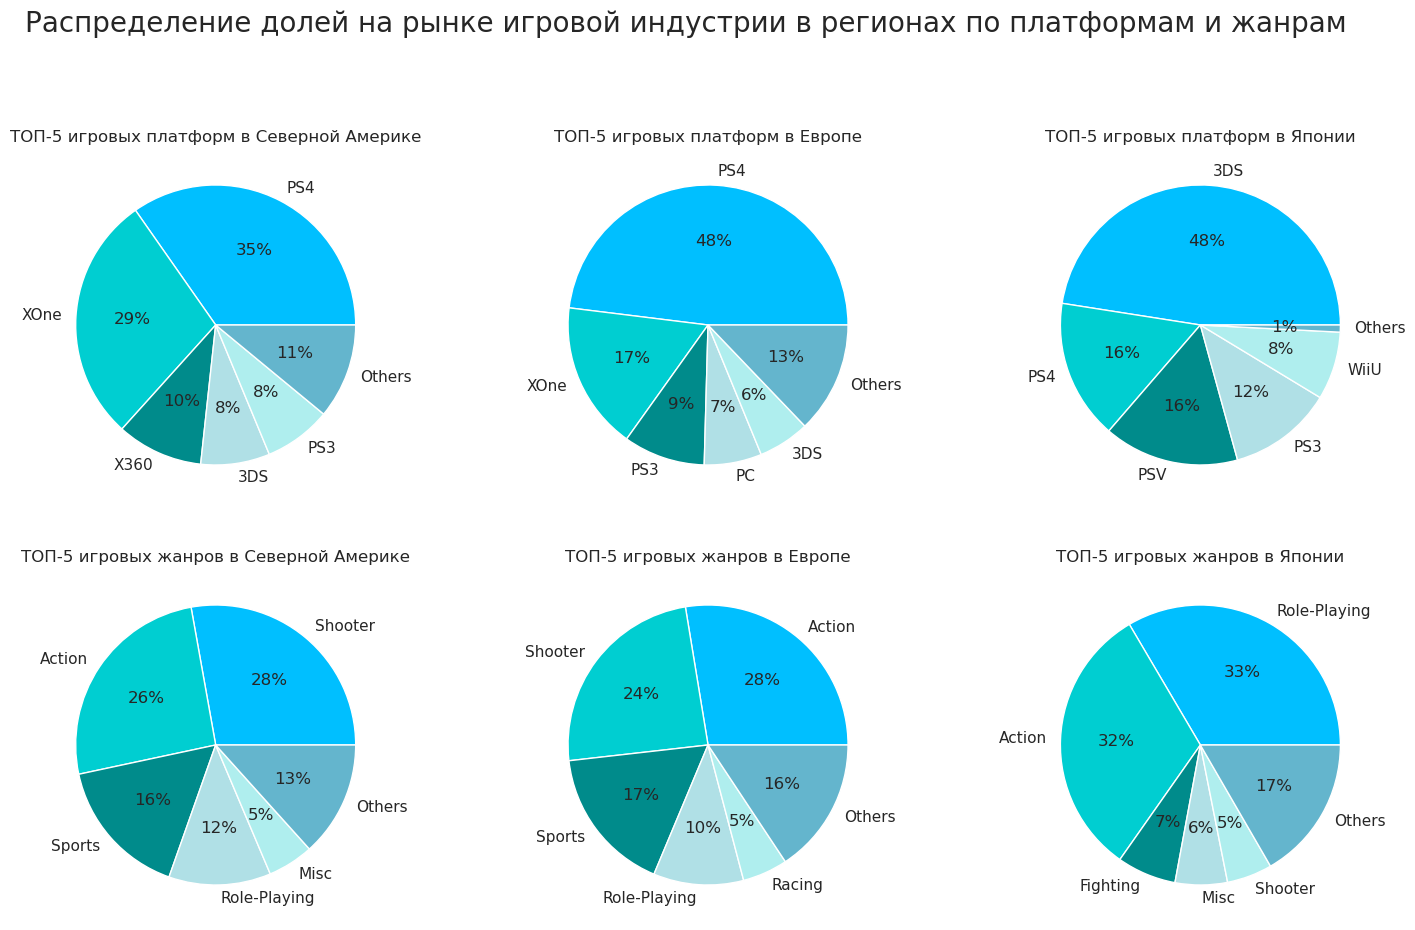

In [98]:
fig, axis = plt.subplots(2,3, figsize=(18,10))
fig.suptitle('Распределение долей на рынке игровой индустрии в регионах по платформам и жанрам', fontsize=20, y=1.02)
top_pl_na.plot.pie(ax=axis[0,0], autopct='%1.f%%', title='ТОП-5 игровых платформ в Северной Америке', ylabel='', colors=["deepskyblue", "darkturquoise", "darkcyan", "powderblue", "paleturquoise","c"])
top_pl_eu.plot.pie(ax=axis[0,1], autopct='%1.f%%', title='ТОП-5 игровых платформ в Европе', ylabel='', colors=["deepskyblue", "darkturquoise", "darkcyan", "powderblue", "paleturquoise","c"])
top_pl_jp.plot.pie(ax=axis[0,2], autopct='%1.f%%', title='ТОП-5 игровых платформ в Японии', ylabel='', colors=["deepskyblue", "darkturquoise", "darkcyan", "powderblue", "paleturquoise","c"])
top_g_na.plot.pie(ax=axis[1,0], autopct='%1.f%%', title='ТОП-5 игровых жанров в Северной Америке', ylabel='', colors=["deepskyblue", "darkturquoise", "darkcyan", "powderblue", "paleturquoise","c"])
top_g_eu.plot.pie(ax=axis[1,1], autopct='%1.f%%', title='ТОП-5 игровых жанров в Европе', ylabel='', colors=["deepskyblue", "darkturquoise", "darkcyan", "powderblue", "paleturquoise","c"])
top_g_jp.plot.pie(ax=axis[1,2], autopct='%1.f%%', title='ТОП-5 игровых жанров в Японии', ylabel='', colors=["deepskyblue", "darkturquoise", "darkcyan", "powderblue", "paleturquoise","c"]);

1. В Северной Америке в топ-5 игровых платформ вошли: PS4, XOne, X360, 3DS и PS3.
2. В Европе в топ-5 игровых платформ вошли: PS4, XOne, PS3, PC, 3DS.
3. В Японии в топ-5 игровых платформ вошли: 3DS, PS4, PSV, PS3, WiiU.
    
1. В Северной Америке в топ-5 игровых жанров вошли: Action, Shooter, Sports, RPG и Misc.
2. В Европе в топ-5 игровых игровых вошли: Action, Shooter, Sports, RPG, Racing.
3. В Японии в топ-5 игровых игровых вошли: RPG, Action, Fighting, Misc, Shooter.

4. Таким образом, мы можем сделать вывод о том, что игроки Северной Америки и Европы имеют схожие предпочтения в выборе игровых платформ PS4 и XOne, но ещё не списывают со счетов платформы предыдущего поколения, такие как X360 или PS3, хоть они и отстают от лидеров по объемам продаж в 2-3 раза. В свою очередь игроки Японии очень преданы своим игровым платформам 3DS, PS4 и PSV.
В целом есть ещё одно интересное наблюдение - доля пользователей, играющих на игровых консолях по всем трём регионам больше, чем доля играющих на ПК, т.е. игры в основном покупают для игровых консолей.

5. Что касается жанров, игроки Северной Америки и Европы охотнее выбирают игровые жанры Action, Shooter и Sports, в то время как в Японии чаще выбирают RPG и Action. Стоит отметить схожую популярность жанра Action по всем трем регионам.

### Определим для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи в отдельном регионе

In [99]:
na_popular_ratings = forecast.groupby('rating').sum().na_sales
na_popular_ratings 

rating
E          50.74
E10+       33.23
M          96.42
T          38.95
no_ESRB    64.72
Name: na_sales, dtype: float64

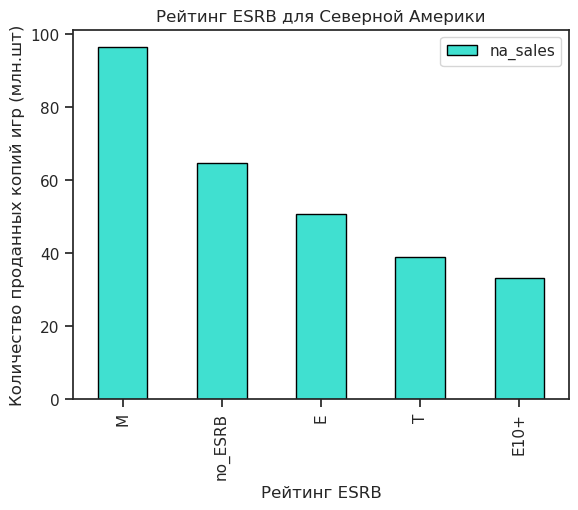

In [100]:
forecast.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color='turquoise', ec='black')
plt.title('Рейтинг ESRB для Северной Америки')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий игр (млн.шт)');

In [101]:
eu_popular_ratings = forecast.groupby('rating').sum().eu_sales
eu_popular_ratings 

rating
E          58.06
E10+       26.16
M          93.44
T          34.07
no_ESRB    58.95
Name: eu_sales, dtype: float64

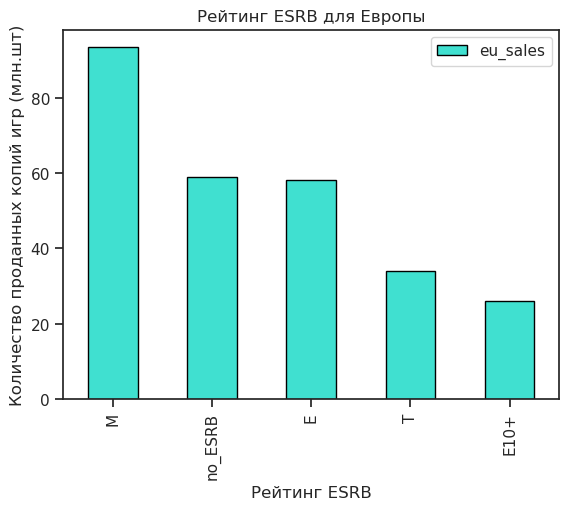

In [102]:
forecast.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', color='turquoise', ec='black')
plt.title('Рейтинг ESRB для Европы')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий игр (млн.шт)');

In [103]:
jp_popular_ratings = forecast.groupby('rating').sum().jp_sales
jp_popular_ratings

rating
E           8.94
E10+        4.46
M           8.01
T          14.78
no_ESRB    56.90
Name: jp_sales, dtype: float64

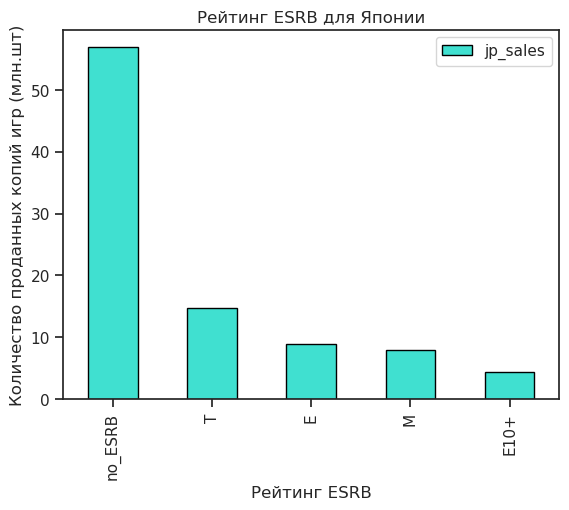

In [104]:
forecast.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color='turquoise', ec='black')
plt.title('Рейтинг ESRB для Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий игр (млн.шт)');

1. В Северной Америке наблюдается следующая картина: 

📈На первом месте по количеству проданных копий (96.42 млн. шт), игры с рейтингом "М" (для взрослых) - материалы таких игр не подходят для лиц младше 17 лет т.к. они могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Рейтинг был принят ESRB в 1994 году.
📈На втором месте по количеству проданных копий (64.72 млн. шт), игры с неопределенным рейтингом.
📉 Самое меньшее по количеству проданных копий (64.72 млн. шт), игры с рейтингом "E10+" (для всех от 10 лет и старше) - материалы таких игр могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB в 2005 году.

2. В Европе наблюдается следующая картина: 

📈На первом месте по количеству проданных копий (93.44 млн. шт), игры с рейтингом "М" (для взрослых).  
📈На втором месте по количеству проданных копий (58.95 млн. шт), игры с неопределенным рейтингом.  
📉Самое меньшее по количеству проданных копий (26.16 млн. шт), игры с рейтингом "E10+" (для всех от 10 лет и старше).

3. В Японии наблюдается следующая картина: 

📈На первом месте по количеству проданных копий (56.90 млн. шт), игры с неопределенным рейтингом.
📈На втором месте по количеству проданных копий (14.78 млн. шт), игры с рейтингом "Т" (для подростков от 13 лет) - материалы таких игр могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. Рейтинг был принят ESRB в 1994 году.
📉Самое меньшее по количеству проданных копий (4.46 млн. шт), игры с рейтингом "E10+" (для всех от 10 лет и старше).

Продажи игр в Северной Америке и Европе очень схожи, геймеры предпочитают более жестокие игры для взрослых, в отличии от японских геймеров, у которых в топ 2 - игры для подростков от 13 лет.

### Вывод по шагу 4

1. Портрет пользователя из Северной Америки:  
- отдаёт предпочтение играм жанра Action, Shooter и Sports 
- играет чаще на платформах PS4 и XOne  
- предпочитает игры с рейтингом "М"  

2. Портрет пользователя из Европы:  
- отдаёт предпочтение играм жанра Action, Shooter и Sports   
- играет чаще на платформах PS4 и XOne  
- предпочитает игры с рейтингом "М"  

3. Портрет пользователя из Японии:  
- отдаёт предпочтение играм жанра RPG и Action  
- играет чаще на платформах 3DS, PS4 и PSV
- предпочитает игры с рейтингом "Т"  

## Шаг 5. Проверим несколько гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0: пользовательские рейтинги Xbox One = пользовательские рейтинги PC  
Н1: пользовательские рейтинги Xbox One ≠ пользовательские рейтинги PC  

In [105]:
forecast['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [106]:
xone_pl = forecast.loc[(forecast['platform'] == 'XOne') & (forecast['user_score'].notna()), 'user_score']
pc_pl = forecast.loc[(forecast['platform'] == "PC") & (forecast['user_score'].notna()), 'user_score']

#Посчитаем дисперсии, чтобы определить параметр equal_var
variance_x = np.var(xone_pl)
print('Дисперсия выборки по платформе Xbox One: {:.5f}'.format(variance_x))

variance_p = np.var(pc_pl)
print('Дисперсия выборки по платформе PC: {:.5f}'.format(variance_p))

Дисперсия выборки по платформе Xbox One: 1.87955
Дисперсия выборки по платформе PC: 2.87737


In [107]:
#задаем параметр equal_var = False т.к. дисперсии выборок различны
results = st.ttest_ind(xone_pl, pc_pl, equal_var=False)
alpha = 0.05 # критический уровень статистической значимости

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


In [108]:
#проверим различаются ли средние значения пользовательских рейтингов Xbox One и PC

print('Средний пользовательский рейтинг платформы Xbox One - {:.2f}'.format(xone_pl.mean()))
print('Средний пользовательский рейтинг платформы PC - {:.2f}'.format(pc_pl.mean()))

Средний пользовательский рейтинг платформы Xbox One - 6.59
Средний пользовательский рейтинг платформы PC - 6.30


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Разница средних значений равна 0.29, при оценке платформ пользователями не является статистически значимой.

### Средние пользовательские рейтинги жанров Action и Sports разные

Н0: пользовательские рейтинги жанра Action = пользовательские рейтинги жанра Sports  
Н1: пользовательские рейтинги жанров Action ≠ пользовательские рейтинги жанра Sports 

In [109]:
forecast['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [110]:
action_g = forecast.loc[(forecast['genre'] == 'Action') & (forecast['user_score'].notna()), 'user_score']
sports_g = forecast.loc[(forecast['genre'] == 'Sports') & (forecast['user_score'].notna()), 'user_score']

#Посчитаем дисперсии, чтобы определить параметр equal_var
variance_x = np.var(action_g)
print('Дисперсия выборки по платформе Xbox One: {:.5f}'.format(variance_x))

variance_p = np.var(sports_g)
print('Дисперсия выборки по платформе PC: {:.5f}'.format(variance_p))

Дисперсия выборки по платформе Xbox One: 1.89208
Дисперсия выборки по платформе PC: 3.41984


In [111]:
#задаем параметр equal_var = False т.к. дисперсии выборок различны

results = st.ttest_ind(action_g, sports_g, equal_var=False)
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [112]:
#проверим различаются ли средние пользовательские рейтинги жанров

print('Средний пользовательский рейтинг жанра Action - {:.2f}'.format(action_g.mean()))
print('Средний пользовательский рейтинг жанра Sports - {:.2f}'.format(sports_g.mean()))

Средний пользовательский рейтинг жанра Action - 6.76
Средний пользовательский рейтинг жанра Sports - 5.23


In [113]:
games.shape

(16443, 12)

Средние пользовательские рейтинги жанров Action и Sports разные. Разница средних значений равна 1.53, выборки значительно отличаются друг от друга, обратное нам доказать не удалось.

### Вывод по шагу 5

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sports разные

## Шаг 6. Общий вывод

В этом проекте мы проанализировали исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах, собранные до 2016 года.

I. Изначально входные данные были очень не полными, в датафрейме было 16715 строк и 11 столбцов. По окончании исследования в нашем наборе осталось 16443 строк и 12 столбцов. В 6 столбцах из 11 были пропуски (самые большие потери были в столбцах 'rating' и 'critic_score').

К сожалению все пропуски восполнить не удалось т.к. заполняя их средним или медианным значением, мы могли бы сильно исказить результаты исследования, чего не следовало бы делать. Есть несколько предположений относительно природы возникновения пропусков:

- при заполнении данных об игре забыли указать дату  
- точная дата выхода игры не была определена  
- произошла ошибка при выгрузке данных из базы  
- организация осуществляющая оценку не брала в расчет все старые игры, вышедшие до её появления  
- рейтинги просто охватывают не весь международный игровой рынок  
- человеческий фактор, ошибка в указании информации составителем рейтингов  
- было произведено некорректное объединение нескольких наборов данных с несовпадающими значениями переменных из-за чего данные оказались потеряны  
- низкие продажи игр  
- отсутствие пользовательского интереса и интереса критиков из-за устаревших игр и платформ
- и др.  

II. В процессе предобработки данных была проделана следующая работа:

1. Привели названия столбцов к нижнему регистру  
2. В столбце 'year_of_release' удалили пропуски и изменили тип данных  
3. В столбце 'user_score' заменили аббревиатуру tbd (пользователи ещё не поставили свою оценку игре)  на значение NaN  
4. В столбце 'rating' привели данные к единому виду, рейтинг 'K-A' переименовали в 'E'  
5. Также заменили пропуски в столбце 'rating' на "no_ESRB"
6. Удалили 2 строки без наименования игр и жанра в столбцах 'name' и 'genre'  
7. Данные в столбце 'critic_score' с оценками критиков не стали заполнять, чтобы не исказить результаты исследования
8. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец 'total_sales'

III. В ходе исследовательского анализа данных из нашей выборки, мы заметили некоторые особенности:

1. Мировая игровая индустрия начала активно развиваться после 1994 года, пик развития пришелся на   2008-2009 годы, после которых идет снижении продаж.
2. За всё время существования игровой индустрии, сильно выделяются 6 игровых платформ по продажам:
- PS2 - 1233.56 млн. копий игр
- X360 - 961.24 млн. копий игр
- PS3 - 931.34 млн. копий игр
- Wii - 891.18 млн. копий игр
- DS - 802.78 млн. копий игр
- PS - 727.58 млн. копий игр
3. Игровые платформы набирают свою популярность в период 4-6 лет своего существования, а средний жизненный цикл игровой платформы составляет 13 лет.
4. На конец 2016 года лидерами игровых платформ являются PlayStation 4 - 2013 года выпуска, Xbox One - 2013 года выпуска и Nintendo 3DS - 2011 года выпуска. 
5. Исходя из наблюдения жизненного цикла игровых платформ, мы взяли срез данных за 2014-2016 годы
6. Создали новый датафрейм "forecast" за актуальный период
6. Вывели топ-5 игровых платформ и построили по ним графики
7. Потенциально прибыльными игровыми платформами можно с уверенностью назвать PS4, XOne и 3DS.
8. Построили диаграммы размаха, изучили подробнее, чем обоснована разница в продажах между платформами
9. Установили, что оценки критиков и пользователей не являются существенным фактором, влияющим на объёмы продаж.
10. Лидирующие позиции среди жанров в мире занимают Action, Shooter, Sports и Role-Playing.

IV. Составили портрет потенциального пользователя для каждого региона (NA, EU, JP)

V. Проверили несколько гипотез и сделали по ним следующие выводы
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sports разные

  
На успешность игры влияют следующие показатели, которые нужно учесть при планировании рекламных кампаний на 2017 год для каждого региона в отдельности(учитывая их различия):
1. Северная Америка
- игра для платформ PS4 (35% от объема всех продаж СА) или XOne (29% от объема всех продаж СА)
- жанр игры Shooter(28% от объема всех продаж СА), Action (26% от объема всех продаж СА) и Sports(16% от объема всех продаж СА)
- игра с рейтингом "М" (для взрослых)
2. Европа
- игра для платформ PS4 (48% от объема всех продаж Е) или XOne (17% от объема всех продаж Е)
- жанр игры Action (28% от объема всех продаж Е), Shooter(24% от объема всех продаж Е) и Sports(17% от объема всех продаж Е)
- игра с рейтингом "М"(для взрослых)
3. Япония
- игра для платформ 3DS (48% от объема всех продаж Я), PS4 (16% от объема всех продаж Я) и PSV (16% от объема всех продаж Я)
- жанр игры Role-Playing (33% от объема всех продаж Я) и Action(32% от объема всех продаж Я)
- игра с рейтингом "Т"(для подростков)